In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data prep

## Names by state data prep

In [3]:
df = pd.read_csv('data_raw/namesbystate/namesbystate_filtered.csv')
df.head()

,state,name,count
0,NY,Mia,836
1,NY,Emma,830
2,NY,Sophia,821
3,NY,Olivia,777
4,NY,Isabella,691


In [4]:
df_ca = df[df['state'] == 'CA'].copy()
df_tx = df[df['state'] == 'TX'].copy()
df_ny = df[df['state'] == 'NY'].copy()
df_fl = df[df['state'] == 'FL'].copy()

def sample_names(df_state, n=1000, random_state=42):
    df_expanded = df_state.loc[df_state.index.repeat(df_state['count'])].reset_index(drop=True) #dis-agregate
    df_expanded = df_expanded[['state', 'name']]  # Remove count column
    sampled = df_expanded.sample(n=n, random_state=random_state)
    return sampled

df_ca_sampled = sample_names(df_ca, n=1000, random_state=42).reset_index(drop=True)
df_tx_sampled = sample_names(df_tx, n=1000, random_state=42).reset_index(drop=True)
df_ny_sampled = sample_names(df_ny, n=1000, random_state=42).reset_index(drop=True)
df_fl_sampled = sample_names(df_fl, n=1000, random_state=42).reset_index(drop=True)

In [5]:
df_ca_agg = (df_ca_sampled.groupby('name')
                          .count()
                          .sort_values(by='state', ascending=False)
                          .reset_index()
                          .rename(columns={'state': 'count'}))
df_tx_agg = (df_tx_sampled.groupby('name')
                          .count()
                          .sort_values(by='state', ascending=False)
                          .reset_index()
                          .rename(columns={'state': 'count'}))
df_fl_agg = (df_fl_sampled.groupby('name')
                          .count()
                          .sort_values(by='state', ascending=False)
                          .reset_index()
                          .rename(columns={'state': 'count'}))
df_ny_agg = (df_ny_sampled.groupby('name')
                          .count()
                          .sort_values(by='state', ascending=False)
                          .reset_index()
                          .rename(columns={'state': 'count'}))

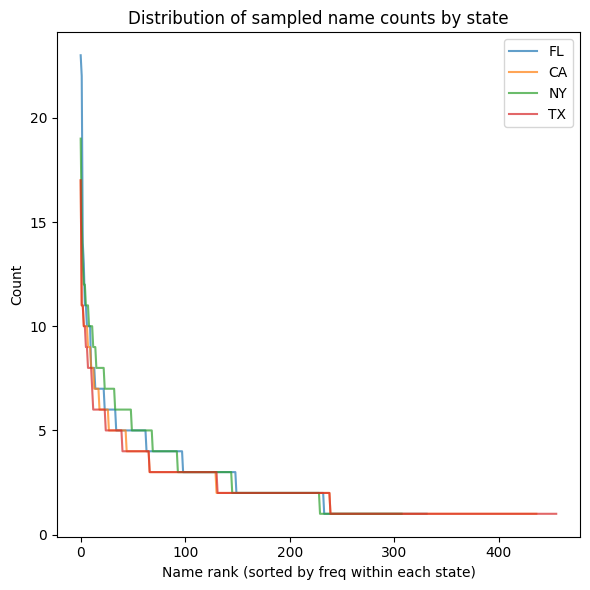

Unique names in CA: 437
Unique names in TX: 456
Unique names in NY: 308
Unique names in FL: 332
--------------------------------------------------


In [12]:
# Plot distributions of counts for each state on the same plot, color coded, with legend
plt.figure(figsize=(6,6))
plt.plot(df_fl_agg['count'].values, label='FL', alpha=0.7)
plt.plot(df_ca_agg['count'].values, label='CA', alpha=0.7)
plt.plot(df_ny_agg['count'].values, label='NY', alpha=0.7)
plt.plot(df_tx_agg['count'].values, label='TX', alpha=0.7)
plt.xlabel('Name rank (sorted by freq within each state)')
plt.ylabel('Count')
plt.title('Distribution of sampled name counts by state')
plt.legend()
plt.tight_layout()
plt.show()
print('Unique names in CA:', df_ca_agg['name'].nunique())
print('Unique names in TX:', df_tx_agg['name'].nunique())
print('Unique names in NY:', df_ny_agg['name'].nunique())
print('Unique names in FL:', df_fl_agg['name'].nunique())
print("-"*50)

In [43]:
#check unique across all states
print('Unique names across all states:', pd.concat([df_ca_agg['name'],df_tx_agg['name'],df_ny_agg['name'],df_fl_agg['name']]).nunique())
print("-"*50)
print('Shared names between states:', len(set(df_ca_agg['name']).intersection(set(df_tx_agg['name']).intersection(set(df_ny_agg['name']).intersection(set(df_fl_agg['name']))))))
print("-"*50)

print('Shared names between state CA and TX:', len(set(df_ca_agg['name']).intersection(set(df_tx_agg['name']))))
print('Shared names between state CA and NY:', len(set(df_ca_agg['name']).intersection(set(df_ny_agg['name']))))
print('Shared names between state CA and FL:', len(set(df_ca_agg['name']).intersection(set(df_fl_agg['name']))))
print('Shared names between state TX and NY:', len(set(df_tx_agg['name']).intersection(set(df_ny_agg['name']))))
print('Shared names between state TX and FL:', len(set(df_tx_agg['name']).intersection(set(df_fl_agg['name']))))
print('Shared names between state NY and FL:', len(set(df_ny_agg['name']).intersection(set(df_fl_agg['name']))))

Unique names across all states: 651
--------------------------------------------------
Shared names between states: 162
--------------------------------------------------
Shared names between state CA and TX: 302
Shared names between state CA and NY: 219
Shared names between state CA and FL: 258
Shared names between state TX and NY: 222
Shared names between state TX and FL: 257
Shared names between state NY and FL: 235


In [66]:
# add back state column for each agg dataframe
df_ca_agg['state'] = 'CA'
df_tx_agg['state'] = 'TX'
df_ny_agg['state'] = 'NY'
df_fl_agg['state'] = 'FL'

# concatenate agg dataframes and exports as csv
df_all_agg = pd.concat([df_ca_agg, df_tx_agg, df_ny_agg, df_fl_agg])
df_all_agg.to_csv('data/namesbystate/namesbystate_agg.csv', index=False)

## Soil type by area data prep

In [35]:
df = pd.read_csv('data_raw/wilderness/wilderness_soil_count.csv')
df.head()

,Wilderness_Area,Soil_Type,count
0,1,1,0
1,2,1,0
2,3,1,0
3,4,1,3031
4,1,2,0


In [36]:
df_1 = df[df['Wilderness_Area'] == 1]
df_2 = df[df['Wilderness_Area'] == 2]
df_3 = df[df['Wilderness_Area'] == 3]
df_4 = df[df['Wilderness_Area'] == 4]

def sample_soils(df_state, n=1000, random_state=42):
    df_expanded = df_state.loc[df_state.index.repeat(df_state['count'])].reset_index(drop=True) #dis-agregate
    df_expanded = df_expanded[['Wilderness_Area', 'Soil_Type']]  # Remove count column
    sampled = df_expanded.sample(n=n, random_state=random_state)
    return sampled

seed = 42
df_1_sampled = sample_soils(df_1, n=1000, random_state=seed).reset_index(drop=True)
df_2_sampled = sample_soils(df_2, n=1000, random_state=seed).reset_index(drop=True)
df_3_sampled = sample_soils(df_3, n=1000, random_state=seed).reset_index(drop=True)
df_4_sampled = sample_soils(df_4, n=1000, random_state=seed).reset_index(drop=True)

In [37]:
df_1_agg = (df_1_sampled.groupby('Soil_Type')
                        .count()
                        .sort_values(by='Wilderness_Area', ascending=False)
                        .reset_index()
                        .rename(columns={'Wilderness_Area': 'count'}))
df_2_agg = (df_2_sampled.groupby('Soil_Type')
                        .count()
                        .sort_values(by='Wilderness_Area', ascending=False)
                        .reset_index()
                        .rename(columns={'Wilderness_Area': 'count'}))
df_3_agg = (df_3_sampled.groupby('Soil_Type')
                        .count()
                        .sort_values(by='Wilderness_Area', ascending=False)
                        .reset_index()
                        .rename(columns={'Wilderness_Area': 'count'}))
df_4_agg = (df_4_sampled.groupby('Soil_Type')
                        .count()
                        .sort_values(by='Wilderness_Area', ascending=False)
                        .reset_index()
                        .rename(columns={'Wilderness_Area': 'count'}))

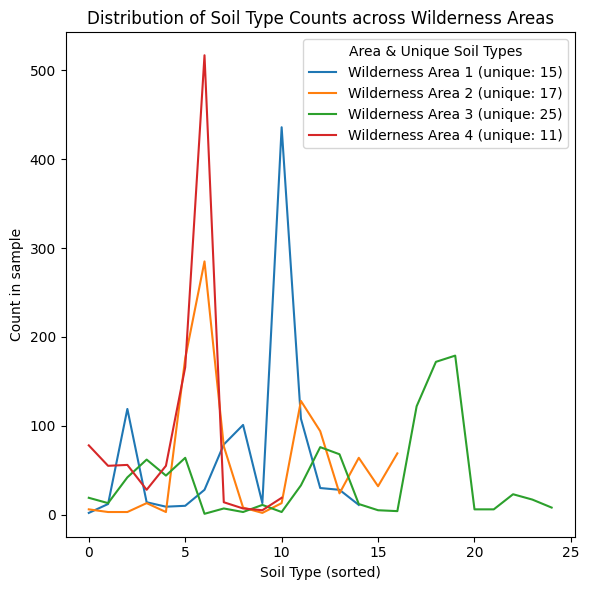

In [70]:
# Plot overlapping distributions with appropriate legend and custom colors

plt.figure(figsize=(6,6))
area_names = ['Wilderness Area 1', 'Wilderness Area 2', 'Wilderness Area 3', 'Wilderness Area 4']
area_colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
agg_dfs = [df_1_agg, df_2_agg, df_3_agg, df_4_agg]

for df_agg, name, colour in zip(agg_dfs, area_names, area_colours):
    # For visual clarity sort by Soil_Type or count
    sorted_counts = df_agg.sort_values(by='Soil_Type')['count'].reset_index(drop=True)
    plt.plot(sorted_counts, label=f"{name} (unique: {df_agg['Soil_Type'].nunique()})", color=colour)

plt.title("Distribution of Soil Type Counts across Wilderness Areas")
plt.xlabel("Soil Type (sorted)")
plt.ylabel("Count in sample")
plt.legend(title="Area & Unique Soil Types")
plt.tight_layout()
plt.show()

In [44]:
#check unique across all states
print('Unique soil types  across all areas:', pd.concat([df_1_agg['Soil_Type'],df_2_agg['Soil_Type'],df_3_agg['Soil_Type'],df_4_agg['Soil_Type']]).nunique())
print("-"*50)

print('Shared soil types between all areas:', len(set(df_1_agg['Soil_Type']).intersection(set(df_2_agg['Soil_Type']).intersection(set(df_3_agg['Soil_Type']).intersection(set(df_4_agg['Soil_Type']))))))

print('Shared soil types between area 1 and area 2:', len(set(df_1_agg['Soil_Type']).intersection(set(df_2_agg['Soil_Type']))))
print('Shared soil types between area 1 and area 3:', len(set(df_1_agg['Soil_Type']).intersection(set(df_3_agg['Soil_Type']))))
print('Shared soil types between area 1 and area 4:', len(set(df_1_agg['Soil_Type']).intersection(set(df_4_agg['Soil_Type']))))
print('Shared soil types between area 2 and area 3:', len(set(df_2_agg['Soil_Type']).intersection(set(df_3_agg['Soil_Type']))))
print('Shared soil types between area 2 and area 4:', len(set(df_2_agg['Soil_Type']).intersection(set(df_4_agg['Soil_Type']))))
print('Shared soil types between area 3 and area 4:', len(set(df_3_agg['Soil_Type']).intersection(set(df_4_agg['Soil_Type']))))

Unique soil types  across all areas: 36
--------------------------------------------------
Shared soil types between all areas: 0
Shared soil types between area 1 and area 2: 11
Shared soil types between area 1 and area 3: 8
Shared soil types between area 1 and area 4: 1
Shared soil types between area 2 and area 3: 13
Shared soil types between area 2 and area 4: 1
Shared soil types between area 3 and area 4: 7


In [252]:
# add back state column for each agg dataframe
df_1_agg['Wilderness_Area'] = 1
df_2_agg['Wilderness_Area'] = 2
df_3_agg['Wilderness_Area'] = 3
df_4_agg['Wilderness_Area'] = 4

# concatenate agg dataframes and exports as csv
df_all_agg = pd.concat([df_1_agg, df_2_agg, df_3_agg, df_4_agg])
df_all_agg.to_csv('data/wilderness/wilderness_agg.csv', index=False)

## Word types by article category

In [30]:
df = pd.read_csv('data_raw/twenty+newsgroups/newsgroup_words_1000_6cats.csv')
df.head()

,category,POS,word,count
0,alt.atheism,ADJ,subject,983
1,alt.atheism,ADJ,many,470
2,alt.atheism,ADJ,moral,409
3,alt.atheism,ADJ,good,402
4,alt.atheism,ADJ,christian,380


In [31]:
df = df[df['count']>50].copy()

In [32]:
POS = 'NOUN'
df_space = df[(df['category']=='sci.space') & (df['POS']==POS)].copy()
df_religion = df[(df['category']=='soc.religion.christian') & (df['POS']==POS)].copy()
df_atheism = df[(df['category']=='alt.atheism') & (df['POS']==POS)].copy()
df_med = df[(df['category']=='sci.med') & (df['POS']==POS)].copy()
df_guns = df[(df['category']=='talk.politics.guns') & (df['POS']==POS)].copy()
df_motorcycles = df[(df['category']=='rec.motorcycles') & (df['POS']==POS)].copy()

def sample_words(df_category, n=1000, random_state=42):
    df_expanded = df_category.loc[df_category.index.repeat(df_category['count'])].reset_index(drop=True) #dis-agregate
    df_expanded = df_expanded[['category', 'word']]  # Remove count column
    sampled = df_expanded.sample(n=n, random_state=random_state)
    return sampled

df_space_sampled = sample_words(df_space, n=1000, random_state=42).reset_index(drop=True)
df_religion_sampled = sample_words(df_religion, n=1000, random_state=42).reset_index(drop=True)
df_atheism_sampled = sample_words(df_atheism, n=1000, random_state=42).reset_index(drop=True)
df_med_sampled = sample_words(df_med, n=1000, random_state=42).reset_index(drop=True)
df_guns_sampled = sample_words(df_guns, n=1000, random_state=42).reset_index(drop=True)
df_motorcycles_sampled = sample_words(df_motorcycles, n=1000, random_state=42).reset_index(drop=True)


In [33]:
df_space_agg = (df_space_sampled.groupby('word')
                        .count()
                        .sort_values(by='category', ascending=False)
                        .reset_index()
                        .rename(columns={'category': 'count'}))

df_religion_agg = (df_religion_sampled.groupby('word')
                        .count()
                        .sort_values(by='category', ascending=False)
                        .reset_index()
                        .rename(columns={'category': 'count'}))
df_atheism_agg = (df_atheism_sampled.groupby('word')
                        .count()
                        .sort_values(by='category', ascending=False)
                        .reset_index()
                        .rename(columns={'category': 'count'}))
df_med_agg = (df_med_sampled.groupby('word')
                        .count()
                        .sort_values(by='category', ascending=False)
                        .reset_index()
                        .rename(columns={'category': 'count'}))
df_guns_agg = (df_guns_sampled.groupby('word')
                        .count()
                        .sort_values(by='category', ascending=False)
                        .reset_index()
                        .rename(columns={'category': 'count'}))
df_motorcycles_agg = (df_motorcycles_sampled.groupby('word')
                        .count()
                        .sort_values(by='category', ascending=False)
                        .reset_index()
                        .rename(columns={'category': 'count'}))

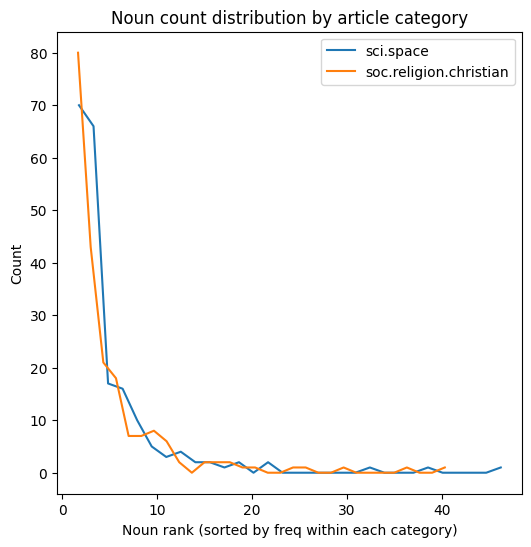

Unique words in sci.space: 203
Unique words in soc.religion.christian: 205
--------------------------------------------------


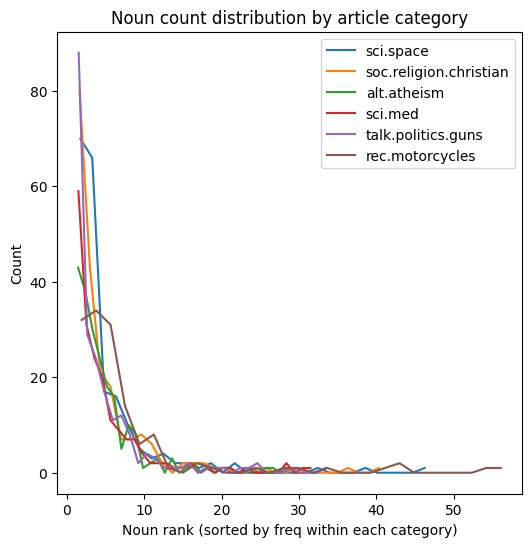

Unique words in sci.space: 203
--------------------------------------------------
Unique words in soc.religion.christian: 205
--------------------------------------------------
Unique words in alt.atheism: 211
--------------------------------------------------
Unique words in sci.med: 190
--------------------------------------------------
Unique words in talk.politics.guns: 212
--------------------------------------------------
Unique words in rec.motorcycles: 138
--------------------------------------------------


In [85]:
# Overlapping line plots, enforced color scheme

import matplotlib.pyplot as plt
import numpy as np

# Set up forced color scheme (from file_context_0 lines 35-36)
category_order = ['sci.space', 'soc.religion.christian', 'alt.atheism', 'sci.med', 'talk.politics.guns', 'rec.motorcycles']
color_order = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
category_to_color = dict(zip(category_order, color_order))

# Helper to get the histogram as data for line plotting
def get_hist_data(data, bins=30):
    hist, bin_edges = np.histogram(data, bins=bins)
    # For line plot, align with bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    return bin_centers, hist

# -- First plot: just sci.space and soc.religion.christian (overlap), as lines --
plt.figure(figsize=(6,6))
for df, cat in zip(
    [df_space_agg, df_religion_agg],
    ['sci.space', 'soc.religion.christian']
):
    centers, freq = get_hist_data(df['count'], bins=30)
    plt.plot(centers, freq, label=cat, color=category_to_color[cat])
plt.legend()
plt.title('Noun count distribution by article category')
plt.xlabel('Noun rank (sorted by freq within each category)')
plt.ylabel('Count')
plt.show()
print('Unique words in sci.space:', df_space_agg['word'].nunique())
print('Unique words in soc.religion.christian:', df_religion_agg['word'].nunique())
print("-"*50)

# -- Second plot: all categories, overlapped, as lines --
plt.figure(figsize=(6,6))
for df, cat in zip(
    [df_space_agg, df_religion_agg, df_atheism_agg, df_med_agg, df_guns_agg, df_motorcycles_agg], 
    category_order
):
    centers, freq = get_hist_data(df['count'], bins=30)
    plt.plot(centers, freq, label=cat, color=category_to_color[cat])

plt.legend()
plt.title('Noun count distribution by article category')
plt.xlabel('Noun rank (sorted by freq within each category)')
plt.ylabel('Count')
plt.show()

for df, cat in zip(
    [df_space_agg, df_religion_agg, df_atheism_agg, df_med_agg, df_guns_agg, df_motorcycles_agg], 
    category_order
):
    print(f"Unique words in {cat}: {df['word'].nunique()}")
    print("-"*50)


In [128]:
# print unique words across all categories
print('Unique words across all categories:', pd.concat([df_space_agg['word'],df_religion_agg['word'],df_atheism_agg['word'],df_med_agg['word'],df_guns_agg['word'],df_motorcycles_agg['word']]).nunique())
print("-"*50)
print('Shared words across all categories:', len(set(df_space_agg['word']).intersection(set(df_religion_agg['word']).intersection(set(df_atheism_agg['word']).intersection(set(df_med_agg['word']).intersection(set(df_guns_agg['word']).intersection(set(df_motorcycles_agg['word']))))))))
print("-"*50)

print('Shared words between sci.space and soc.religion.christian:', len(set(df_space_agg['word']).intersection(set(df_religion_agg['word']))))
print("-"*50)

print('Shared words between sci.space and alt.atheism:', len(set(df_space_agg['word']).intersection(set(df_atheism_agg['word']))))
print("-"*50)

print('Shared words between sci.space and sci.med:', len(set(df_space_agg['word']).intersection(set(df_med_agg['word']))))
print("-"*50)

print('Shared words between sci.space and talk.politics.guns:', len(set(df_space_agg['word']).intersection(set(df_guns_agg['word']))))
print("-"*50)

print('Shared words between sci.space and rec.motorcycles:', len(set(df_space_agg['word']).intersection(set(df_motorcycles_agg['word']))))
print("-"*50)

print('Shared words between sci.med and alt.atheism:', len(set(df_med_agg['word']).intersection(set(df_atheism_agg['word']))))
print("-"*50)

print('Shared words between sci.med and talk.politics.guns:', len(set(df_med_agg['word']).intersection(set(df_guns_agg['word']))))
print("-"*50)

print('Shared words between sci.med and rec.motorcycles:', len(set(df_med_agg['word']).intersection(set(df_motorcycles_agg['word']))))
print("-"*50)

print('Shared words between talk.politics.guns and rec.motorcycles:', len(set(df_guns_agg['word']).intersection(set(df_motorcycles_agg['word']))))
print("-"*50)

print('Shared words between alt.atheism and rec.motorcycles:', len(set(df_atheism_agg['word']).intersection(set(df_motorcycles_agg['word']))))
print("-"*50)

Unique words across all categories: 623
--------------------------------------------------
Shared words across all categories: 40
--------------------------------------------------
Shared words between sci.space and soc.religion.christian: 74
--------------------------------------------------
Shared words between sci.space and alt.atheism: 82
--------------------------------------------------
Shared words between sci.space and sci.med: 89
--------------------------------------------------
Shared words between sci.space and talk.politics.guns: 89
--------------------------------------------------
Shared words between sci.space and rec.motorcycles: 66
--------------------------------------------------
Shared words between sci.med and alt.atheism: 83
--------------------------------------------------
Shared words between sci.med and talk.politics.guns: 88
--------------------------------------------------
Shared words between sci.med and rec.motorcycles: 67
-------------------------------

In [129]:
# add back category column for each agg dataframe
df_space_agg['category'] = 'sci.space'
df_religion_agg['category'] = 'soc.religion.christian'
df_atheism_agg['category'] = 'alt.atheism'
df_med_agg['category'] = 'sci.med'
df_guns_agg['category'] = 'talk.politics.guns'
df_motorcycles_agg['category'] = 'rec.motorcycles'

# concatenate agg dataframes and exports as csv
df_all_agg = pd.concat([df_space_agg, df_religion_agg, df_atheism_agg, df_med_agg, df_guns_agg, df_motorcycles_agg])
df_all_agg.to_csv('data/twenty+newsgroups/newsgroup_noun_agg_6cats.csv', index=False)

# Results

## Names by state

In [13]:
dep_predictions = pd.read_csv('scripts/results_namesbystate_final_V2/tables/dependent_predictions.csv')
ind_predictions = pd.read_csv('scripts/results_namesbystate_final_V2/tables/independent_predictions.csv')
model_comparison = pd.read_csv('scripts/results_namesbystate_final_V2/tables/model_comparison.csv')
param_estimates = pd.read_csv('scripts/results_namesbystate_final_V2/tables/parameter_estimates.csv')

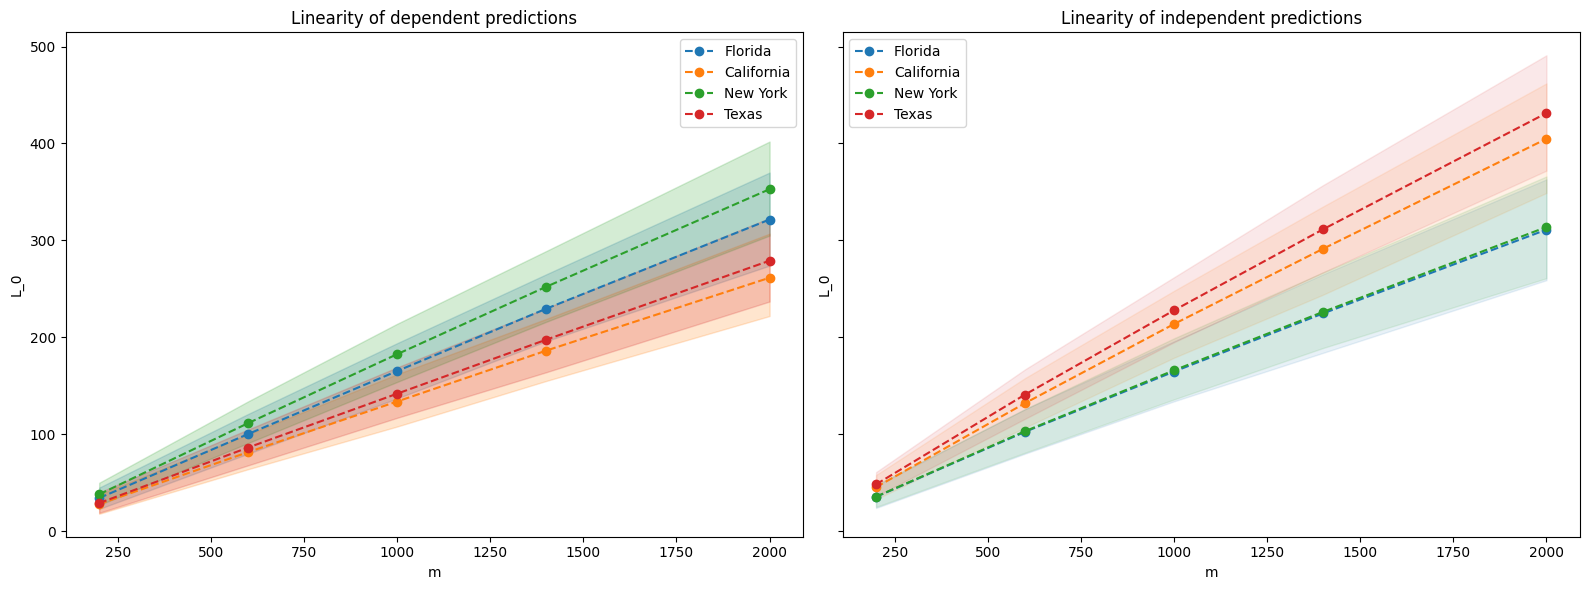

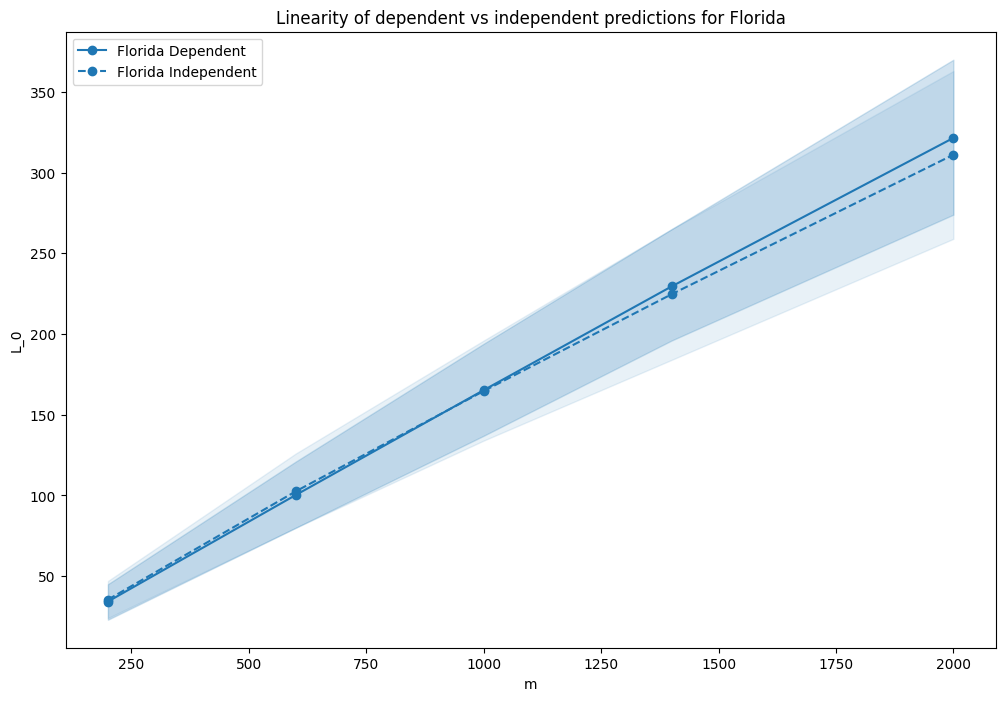

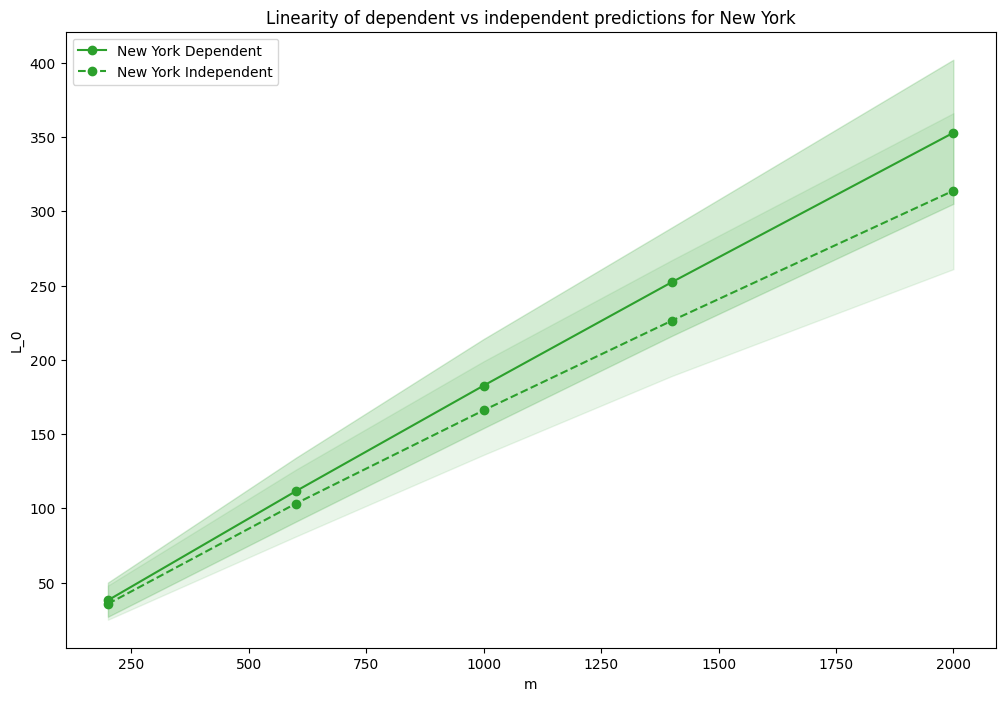

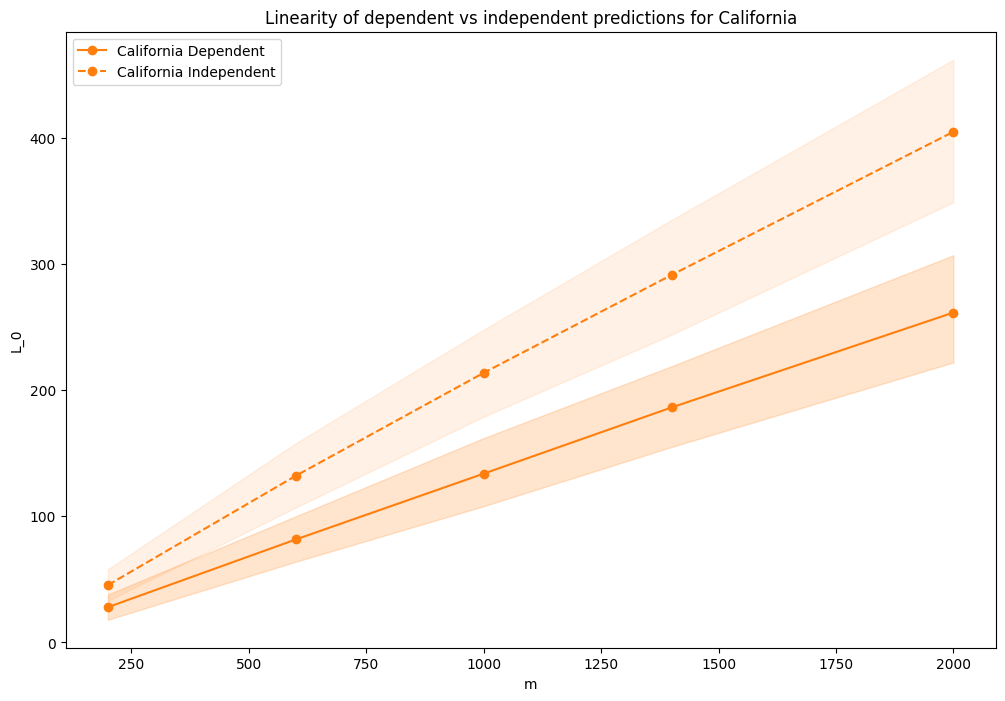

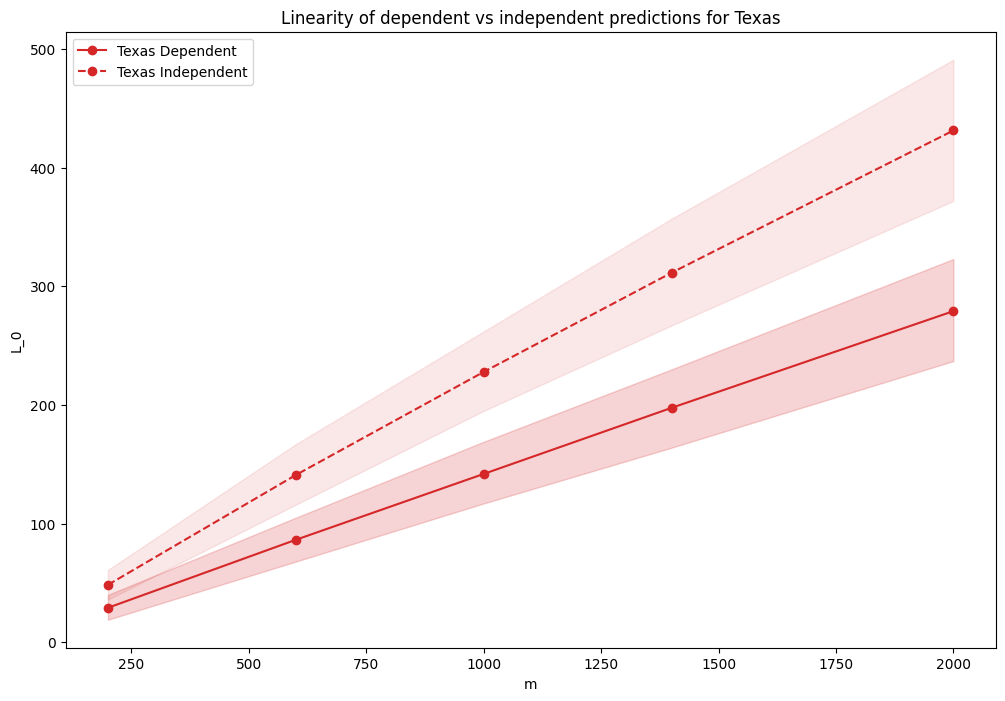

In [18]:
## Linearity Dependent
def extract_dep(arr, col='L_0'):
    vals = arr[['m', col, 'HPD']].copy()
    # HPD is assumed as a tuple string, e.g. "(28, 51)"
    hpds = vals['HPD'].str.strip('()').str.split(',', expand=True)
    vals['lower'] = hpds[0].astype(float)
    vals['upper'] = hpds[1].astype(float)
    return vals

fl_dep_df = extract_dep(dep_predictions[dep_predictions['state']=='FL'])
ca_dep_df = extract_dep(dep_predictions[dep_predictions['state']=='CA'])
ny_dep_df = extract_dep(dep_predictions[dep_predictions['state']=='NY'])
tx_dep_df = extract_dep(dep_predictions[dep_predictions['state']=='TX'])

## Linearity Independent 
def extract_ind(arr, col_l0, col_hpd):
    vals = arr[['m', col_l0, col_hpd]].copy()
    hpds = vals[col_hpd].str.strip('()').str.split(',', expand=True)
    vals['lower'] = hpds[0].astype(float)
    vals['upper'] = hpds[1].astype(float)
    vals = vals.rename(columns={col_l0: 'L_0'})
    return vals

fl_ind_df = extract_ind(ind_predictions, 'FL_L0', 'FL_HPD')
ca_ind_df = extract_ind(ind_predictions, 'CA_L0', 'CA_HPD')
ny_ind_df = extract_ind(ind_predictions, 'NY_L0', 'NY_HPD')
tx_ind_df = extract_ind(ind_predictions, 'TX_L0', 'TX_HPD')

# Plot both sets in a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Left: dependent predictions
ax = axes[0]
for df, label, color in zip([fl_dep_df, ca_dep_df, ny_dep_df, tx_dep_df],
                            ['Florida', 'California', 'New York', 'Texas'],
                            ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']):
    ax.plot(df['m'], df['L_0'], label=label, marker='o', color=color, linestyle='dashed')
    ax.fill_between(df['m'], df['lower'], df['upper'], color=color, alpha=0.2)
ax.set_xlabel('m')
ax.set_ylabel('L_0')
ax.set_title('Linearity of dependent predictions')
ax.legend()

# Right: independent predictions
ax = axes[1]
for df, label, color in zip([fl_ind_df, ca_ind_df, ny_ind_df, tx_ind_df],
                            ['Florida', 'California', 'New York', 'Texas'],
                            ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']):
    ax.plot(df['m'], df['L_0'], label=label, marker='o', color=color, linestyle='dashed')
    ax.fill_between(df['m'], df['lower'], df['upper'], color=color, alpha=0.1)
ax.set_xlabel('m')
ax.set_ylabel('L_0')
ax.set_title('Linearity of independent predictions')
ax.legend()

plt.tight_layout()
plt.show()

# plot lines per state (dependent with CIs vs independent with CIs)
for state_label, dep_df, ind_df, color in zip(
    ['Florida', 'New York', 'California', 'Texas'],
    [fl_dep_df, ny_dep_df, ca_dep_df, tx_dep_df],
    [fl_ind_df, ny_ind_df, ca_ind_df, tx_ind_df],
    ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']
):
    plt.figure(figsize=(12, 8))
    plt.plot(dep_df['m'], dep_df['L_0'], label=f'{state_label} Dependent', marker='o', color=color)
    plt.fill_between(dep_df['m'], dep_df['lower'], dep_df['upper'], color=color, alpha=0.2)
    plt.plot(ind_df['m'], ind_df['L_0'], label=f'{state_label} Independent', marker='o', color=color, linestyle='dashed')
    plt.fill_between(ind_df['m'], ind_df['lower'], ind_df['upper'], color=color, alpha=0.1)
    plt.xlabel('m')
    plt.ylabel('L_0')
    plt.title(f'Linearity of dependent vs independent predictions for {state_label}')
    plt.legend()
    plt.show()


In [25]:
# Create a table where rows are values of m and columns are states, containing L_0_0 / L_0 for each state
states = ['FL', 'NY', 'TX', 'CA']
ratio_table = pd.DataFrame()

for state in states:
    df_focus = dep_predictions[dep_predictions['state'] == state].copy()
    df_focus = df_focus.set_index('m')
    ratio_table[state] = df_focus['L_0_0'] / df_focus['L_0']

ratio_table.index.name = 'm'
print(ratio_table.to_string())

            FL        NY        TX        CA
m                                           
200   0.301226  0.266807  0.340448  0.356938
600   0.302423  0.259661  0.315655  0.345706
1000  0.302977  0.257994  0.301360  0.332661
1400  0.304213  0.253738  0.287529  0.323618
2000  0.304379  0.246939  0.273327  0.310531


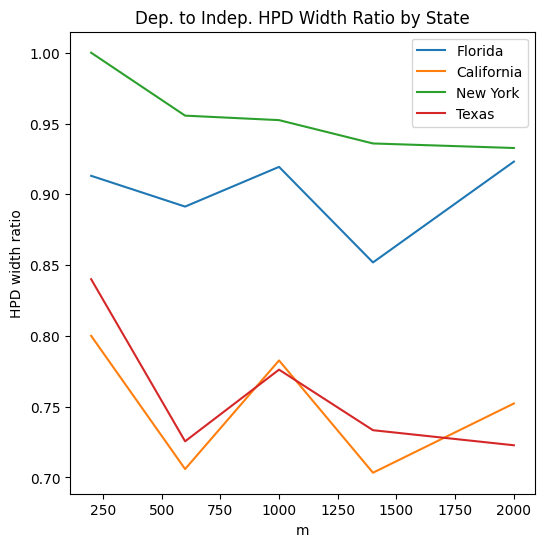

In [29]:
model_comparison['width_ratio'] = model_comparison['dependent_hpd_width'] / model_comparison['independent_hpd_width']
import matplotlib.pyplot as plt

# Use consistent state labels and colors as in @playground.ipynb (47-48)
state_labels = ['Florida', 'California', 'New York', 'Texas']
state_codes = ['FL', 'CA', 'NY', 'TX']
state_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

plt.figure(figsize=(6, 6))
for code, label, color in zip(state_codes, state_labels, state_colors):
    group = model_comparison[model_comparison['state'] == code]
    plt.plot(group['m'], group['width_ratio'], label=label, color=color)

plt.xlabel('m')
plt.ylabel('HPD width ratio')
plt.title('Dep. to Indep. HPD Width Ratio by State')
plt.legend()
plt.show()

In [26]:
model_comparison['width_reduction_pct'] = model_comparison['width_reduction_pct'].str.strip('%').astype(float)
model_comparison.groupby('state')['width_reduction_pct'].mean()

state
CA    25.12
FL    10.02
NY     4.48
TX    24.06
Name: width_reduction_pct, dtype: float64

In [ ]:
dep_predictions

,m,state,L_0_0,L_from_NY,L_from_CA,L_from_TX,L_0,HPD,L_from_FL
0,200,FL,10.32,9.53,10.17,4.25,34.26,"(23, 45)",NaN
1,200,NY,10.16,NaN,9.95,4.05,38.08,"(27, 50)",13.93
2,200,CA,9.98,3.30,NaN,4.19,27.96,"(18, 38)",10.50
3,200,TX,9.89,3.98,3.35,NaN,29.05,"(19, 40)",11.82
4,600,FL,30.33,27.97,29.73,12.26,100.29,"(80, 121)",NaN
5,600,NY,28.96,NaN,28.45,11.90,111.53,"(91, 134)",42.22
6,600,CA,28.22,10.21,NaN,11.45,81.63,"(64, 100)",31.74
7,600,TX,27.26,12.23,10.40,NaN,86.36,"(68, 105)",36.47
8,1000,FL,50.07,45.87,49.10,20.21,165.26,"(137, 194)",NaN
9,1000,NY,47.12,NaN,45.51,19.15,182.64,"(154, 214)",70.86


In [81]:
ind_predictions

,m,FL_L0,FL_HPD,NY_L0,NY_HPD,CA_L0,CA_HPD,TX_L0,TX_HPD
0,200,35.45,"(24, 47)",35.65,"(25, 48)",45.45,"(33, 58)",48.38,"(36, 61)"
1,600,102.57,"(80, 126)",103.19,"(81, 126)",132.14,"(107, 158)",140.98,"(116, 167)"
2,1000,164.70,"(134, 196)",166.01,"(136, 199)",213.75,"(179, 248)",227.87,"(195, 262)"
3,1400,224.66,"(184, 265)",226.23,"(189, 267)",291.34,"(244, 335)",311.45,"(267, 357)"
4,2000,311.13,"(259, 363)",313.83,"(261, 366)",404.85,"(349, 462)",431.35,"(372, 491)"


In [68]:
param_estimates

,model,state,theta_0,theta_j,d_0,d_j,num_base_tables,num_unique_dishes
0,Independent,FL,449.95 ± 26.91,1382.34 ± 71.46,0.0041 ± 0.0050,0.0212 ± 0.0192,316.0,316.0
1,Independent,NY,439.30 ± 23.51,1377.17 ± 81.19,0.0037 ± 0.0024,0.0264 ± 0.0230,308.0,308.0
2,Independent,CA,648.12 ± 33.28,1435.43 ± 73.20,0.0045 ± 0.0033,0.0786 ± 0.0674,437.0,437.0
3,Independent,TX,662.20 ± 31.72,1437.05 ± 88.80,0.0049 ± 0.0053,0.0821 ± 0.0690,443.0,443.0
4,Dependent,ALL (shared),346.76 ± 14.98,1530.01 ± 76.85,0.0031 ± 0.0020,0.0680 ± 0.0415,648.0,648.0


## Wilderness

In [41]:
dep_predictions = pd.read_csv('scripts/results_wilderness_final_V2/tables/dependent_predictions.csv')
ind_predictions = pd.read_csv('scripts/results_wilderness_final_V2/tables/independent_predictions.csv')
model_comparison = pd.read_csv('scripts/results_wilderness_final_V2/tables/model_comparison.csv')
param_estimates = pd.read_csv('scripts/results_wilderness_final_V2/tables/parameter_estimates.csv')

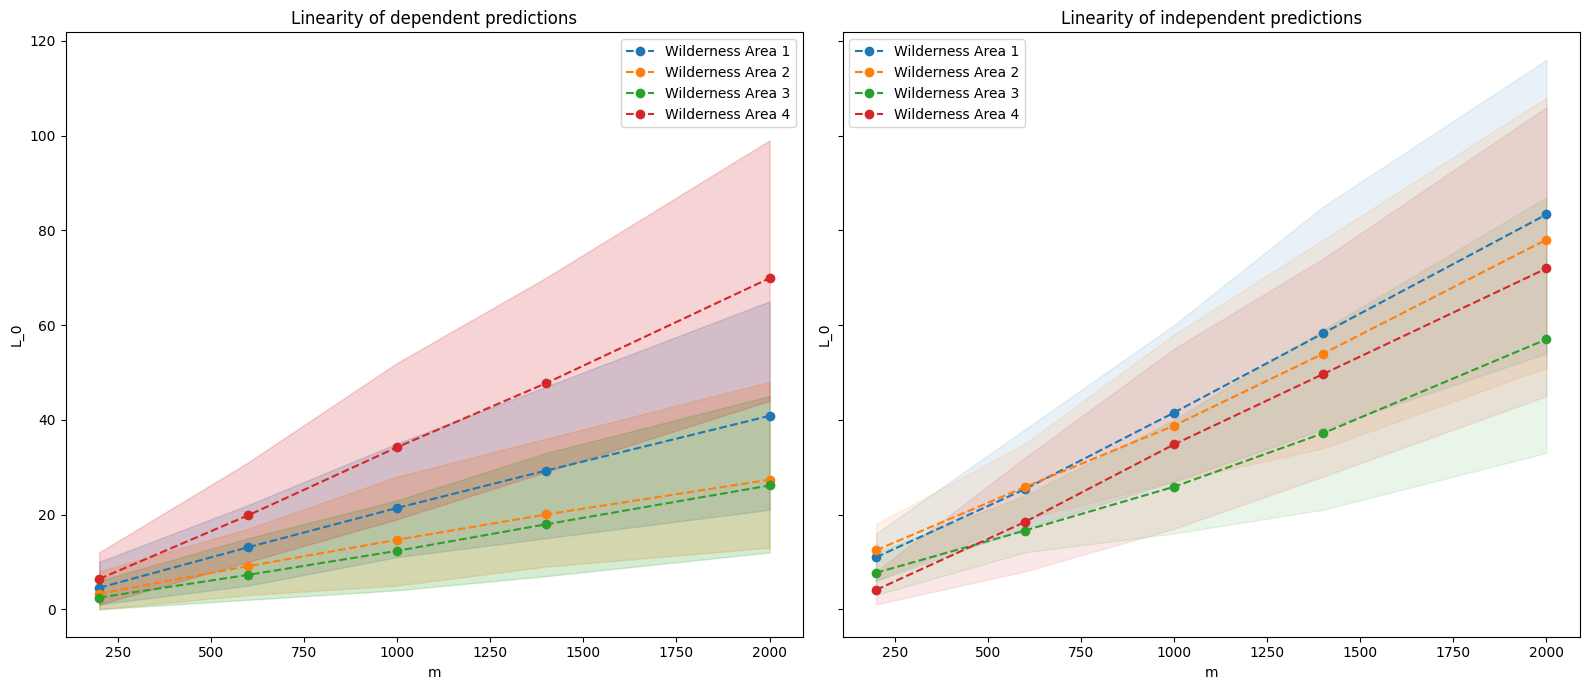

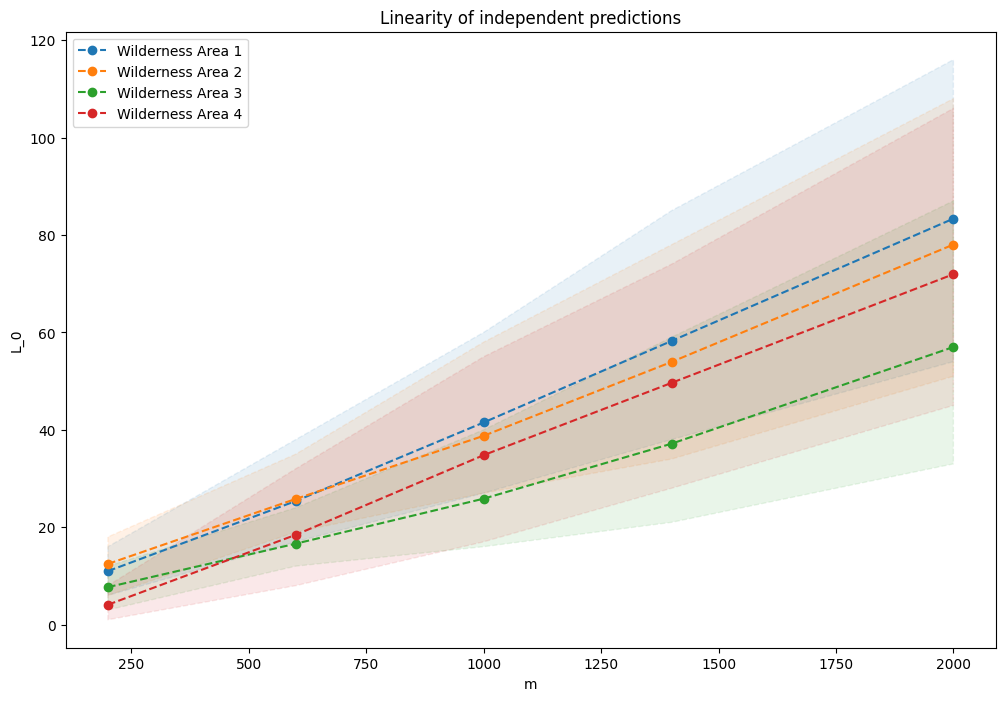

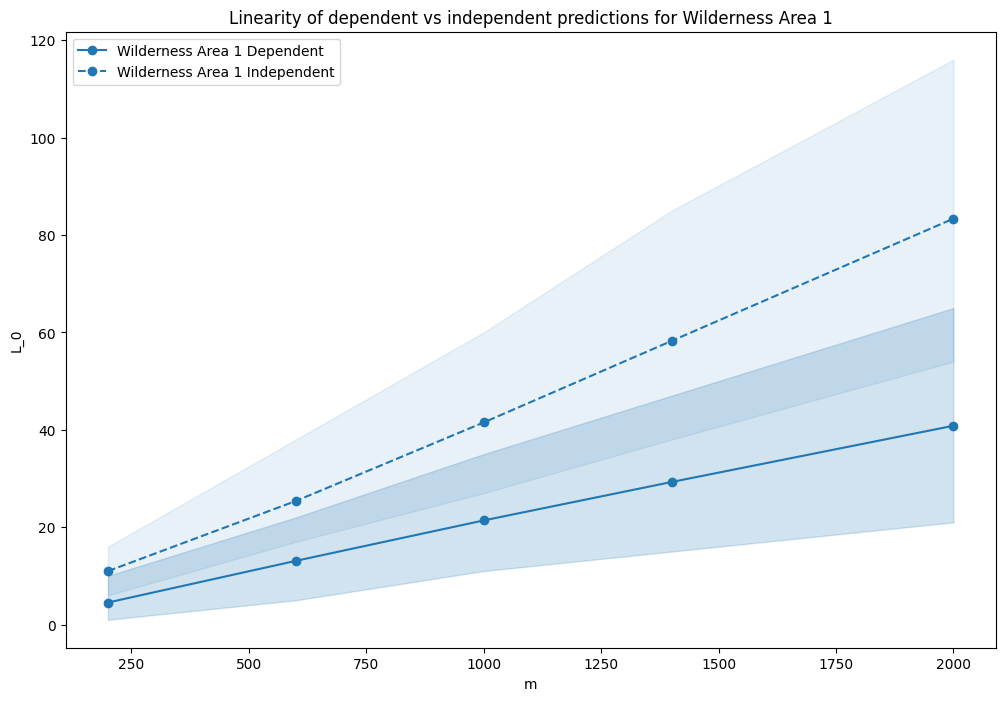

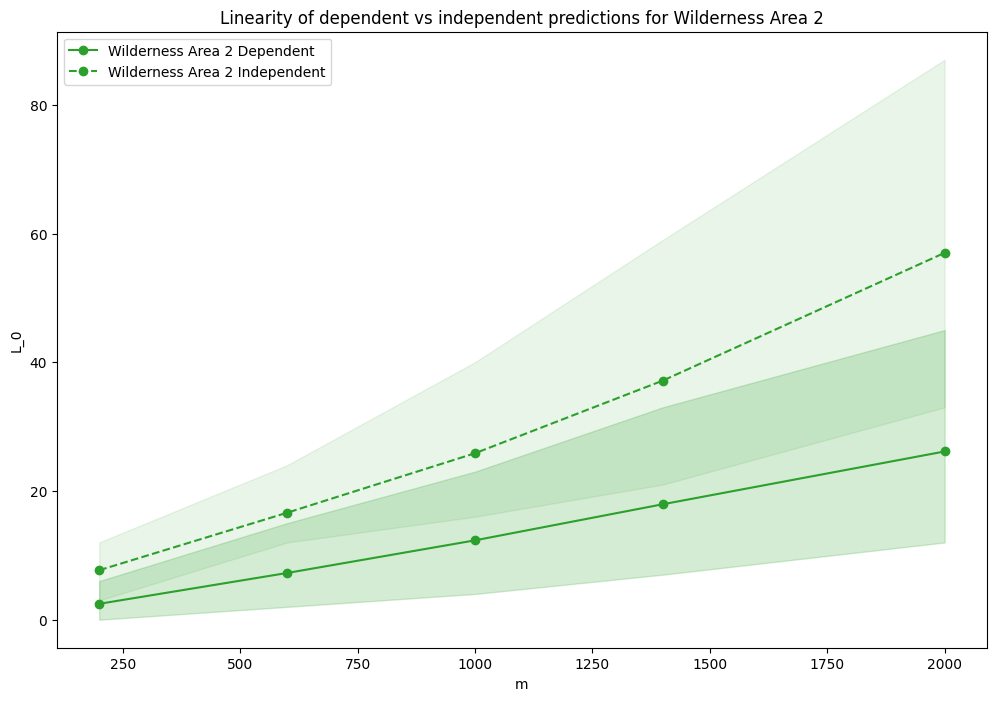

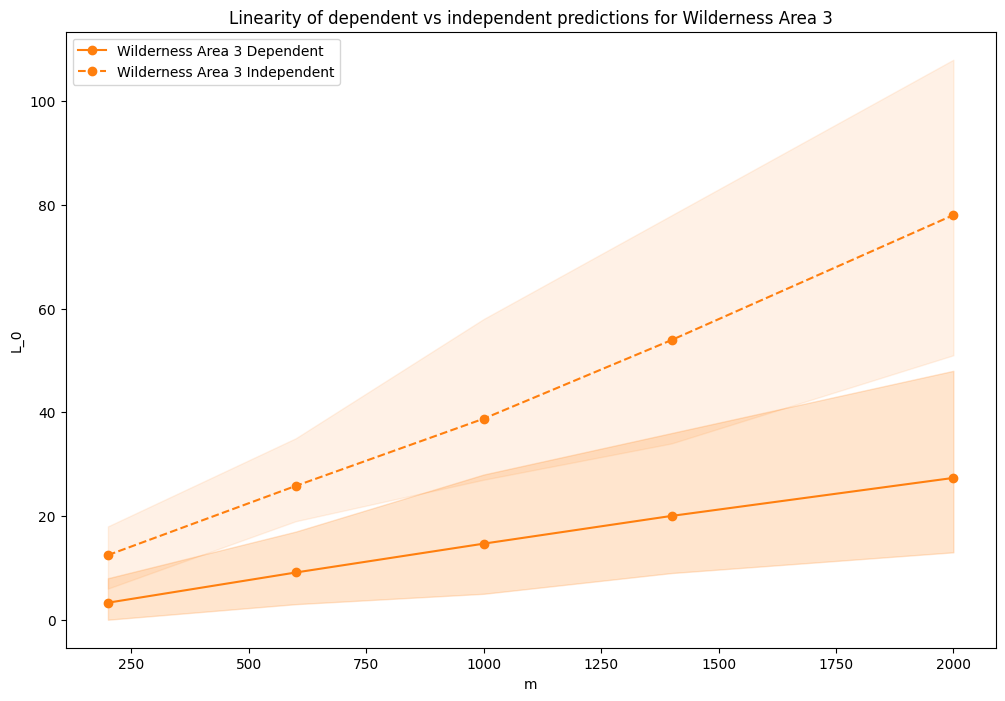

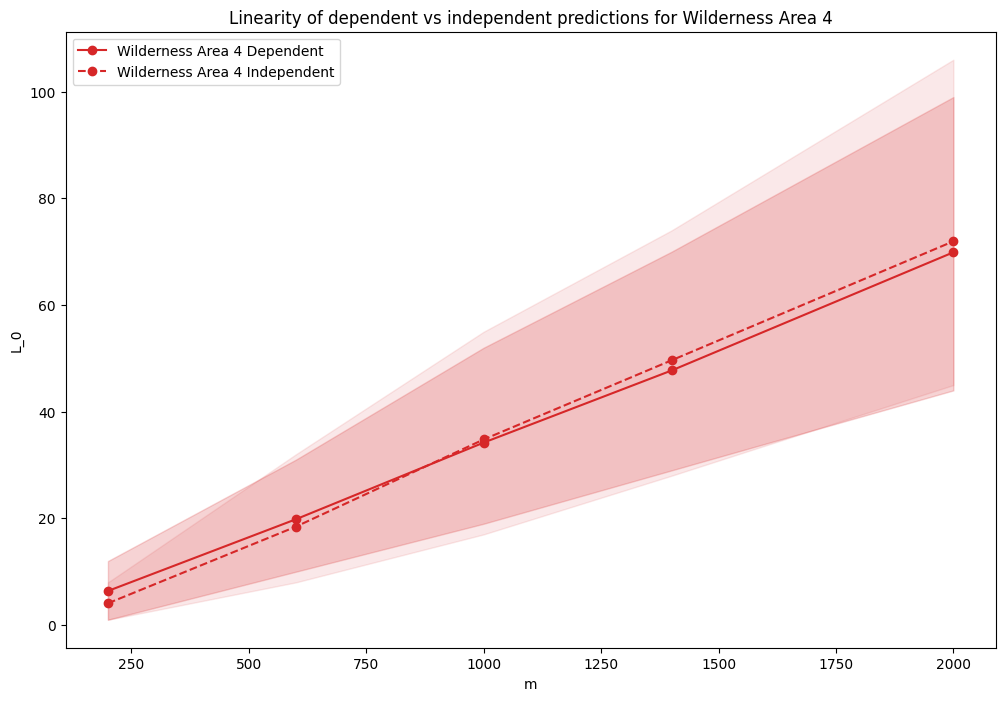

In [50]:
## Linearity Dependent
def extract_dep(arr, col='L_0'):
    vals = arr[['m', col, 'HPD']].copy()
    # HPD is assumed as a tuple string, e.g. "(28, 51)"
    hpds = vals['HPD'].str.strip('()').str.split(',', expand=True)
    vals['lower'] = hpds[0].astype(float)
    vals['upper'] = hpds[1].astype(float)
    return vals

fl_dep_df = extract_dep(dep_predictions[dep_predictions['state']==1])
ca_dep_df = extract_dep(dep_predictions[dep_predictions['state']==2])
ny_dep_df = extract_dep(dep_predictions[dep_predictions['state']==3])
tx_dep_df = extract_dep(dep_predictions[dep_predictions['state']==4])

## Linearity Independent 
def extract_ind(arr, col_l0, col_hpd):
    vals = arr[['m', col_l0, col_hpd]].copy()
    hpds = vals[col_hpd].str.strip('()').str.split(',', expand=True)
    vals['lower'] = hpds[0].astype(float)
    vals['upper'] = hpds[1].astype(float)
    vals = vals.rename(columns={col_l0: 'L_0'})
    return vals

fl_ind_df = extract_ind(ind_predictions, '1_L0', '1_HPD')
ca_ind_df = extract_ind(ind_predictions, '2_L0', '2_HPD')
ny_ind_df = extract_ind(ind_predictions, '3_L0', '3_HPD')
tx_ind_df = extract_ind(ind_predictions, '4_L0', '4_HPD')

# Structure into a 2x1 grid (2 columns, 1 row) with shared y-axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7), sharey=True)

# Dependent predictions in the left column
ax = axes[0]
for df, label, color in zip(
    [fl_dep_df, ca_dep_df, ny_dep_df, tx_dep_df],
    ['Wilderness Area 1', 'Wilderness Area 2', 'Wilderness Area 3', 'Wilderness Area 4'],
    ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
):
    ax.plot(df['m'], df['L_0'], label=label, marker='o', color=color, linestyle='dashed')
    ax.fill_between(df['m'], df['lower'], df['upper'], color=color, alpha=0.2)
ax.set_xlabel('m')
ax.set_ylabel('L_0')
ax.set_title('Linearity of dependent predictions')
ax.legend()

# Independent predictions in the right column
ax = axes[1]
for df, label, color in zip(
    [fl_ind_df, ca_ind_df, ny_ind_df, tx_ind_df],
    ['Wilderness Area 1', 'Wilderness Area 2', 'Wilderness Area 3', 'Wilderness Area 4'],
    ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
):
    ax.plot(df['m'], df['L_0'], label=label, marker='o', color=color, linestyle='dashed')
    ax.fill_between(df['m'], df['lower'], df['upper'], color=color, alpha=0.1)
ax.set_xlabel('m')
ax.set_ylabel('L_0')
ax.set_title('Linearity of independent predictions')
ax.legend()

plt.tight_layout()
plt.show()


# Plot lines for independent predictions with HPD confidence intervals
plt.figure(figsize=(12, 8))
for df, label, color in zip([fl_ind_df, ca_ind_df, ny_ind_df, tx_ind_df],
                            ['Wilderness Area 1', 'Wilderness Area 2', 'Wilderness Area 3', 'Wilderness Area 4'],
                            ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']):
    plt.plot(df['m'], df['L_0'], label=label, marker='o', color=color, linestyle='dashed')
    plt.fill_between(df['m'], df['lower'], df['upper'], color=color, alpha=0.1, linestyle='dashed')
plt.xlabel('m')
plt.ylabel('L_0')
plt.title('Linearity of independent predictions')
plt.legend()
plt.show()

# plot lines per state (dependent with CIs vs independent with CIs)
for state_label, dep_df, ind_df, color in zip(
    ['Wilderness Area 1', 'Wilderness Area 2', 'Wilderness Area 3', 'Wilderness Area 4'],
    [fl_dep_df, ny_dep_df, ca_dep_df, tx_dep_df],
    [fl_ind_df, ny_ind_df, ca_ind_df, tx_ind_df],
    ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']
):
    plt.figure(figsize=(12, 8))
    plt.plot(dep_df['m'], dep_df['L_0'], label=f'{state_label} Dependent', marker='o', color=color)
    plt.fill_between(dep_df['m'], dep_df['lower'], dep_df['upper'], color=color, alpha=0.2)
    plt.plot(ind_df['m'], ind_df['L_0'], label=f'{state_label} Independent', marker='o', color=color, linestyle='dashed')
    plt.fill_between(ind_df['m'], ind_df['lower'], ind_df['upper'], color=color, alpha=0.1)
    plt.xlabel('m')
    plt.ylabel('L_0')
    plt.title(f'Linearity of dependent vs independent predictions for {state_label}')
    plt.legend()
    plt.show()


In [105]:
base_state = 4
other_states = [i for i in range(1,5) if i != base_state]

df_focus = dep_predictions[dep_predictions['state'] == base_state]
base_state_global_new = df_focus['L_0_0']

# df_focus['L_0_0'] / (df_focus[f'L_from_{other_states[0]}'] +  df_focus[f'L_from_{other_states[1]}'] +  df_focus[f'L_from_{other_states[2]}'])
df_focus['L_0_0'] / df_focus['L_0']

3     0.014085
7     0.005547
11    0.003215
15    0.002095
19    0.001717
dtype: float64

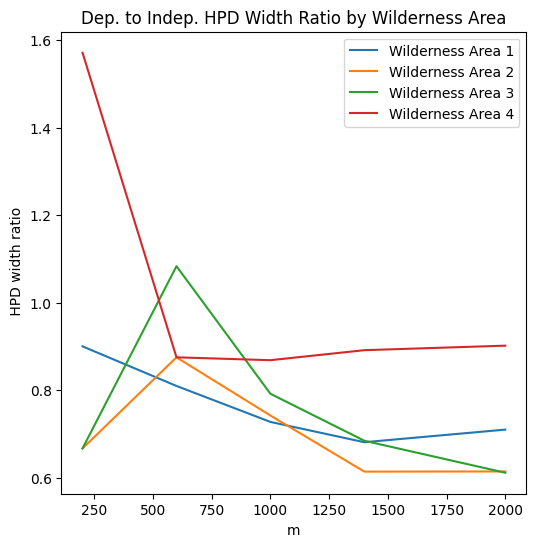

In [47]:
model_comparison['width_ratio'] = model_comparison['dependent_hpd_width'] / model_comparison['independent_hpd_width']
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
# Define explicit color mapping for each area
color_map = {
    1: 'tab:blue',
    2: 'tab:orange',
    3: 'tab:green',
    4: 'tab:red'
}
# Group the data by 'state' and plot width_ratio vs m for each state with forced coloring
for state, group in model_comparison.groupby('state'):
    color = color_map.get(state, None)
    plt.plot(group['m'], group['width_ratio'], label=f'Wilderness Area {state}', color=color)

plt.xlabel('m')
plt.ylabel(' HPD width ratio')
plt.title('Dep. to Indep. HPD Width Ratio by Wilderness Area')
plt.legend()
plt.show()

In [18]:
dep_predictions

,m,state,L_0_0,L_from_2,L_from_3,L_from_4,L_0,HPD,L_from_1
0,200,1,0.15,1.75,1.94,0.68,4.53,"(1, 10)",NaN
1,200,2,0.13,NaN,1.94,0.64,3.28,"(0, 8)",0.57
2,200,3,0.11,0.02,NaN,0.62,2.47,"(0, 6)",1.72
3,200,4,0.09,1.82,0.05,NaN,6.39,"(1, 12)",4.43
4,600,1,0.44,5.09,5.72,1.84,13.09,"(5, 22)",NaN
5,600,2,0.26,NaN,5.05,1.78,9.11,"(3, 17)",2.02
6,600,3,0.17,0.06,NaN,1.58,7.26,"(2, 15)",5.45
7,600,4,0.11,5.74,0.22,NaN,19.83,"(10, 31)",13.76
8,1000,1,0.66,8.31,9.36,3.06,21.39,"(11, 35)",NaN
9,1000,2,0.32,NaN,7.74,2.67,14.67,"(5, 28)",3.94


In [19]:
ind_predictions

,m,1_L0,1_HPD,2_L0,2_HPD,3_L0,3_HPD,4_L0,4_HPD
0,200,10.98,"(6, 16)",12.46,"(6, 18)",7.69,"(3, 12)",4.08,"(1, 8)"
1,600,25.38,"(17, 38)",25.81,"(19, 35)",16.62,"(12, 24)",18.44,"(8, 32)"
2,1000,41.51,"(27, 60)",38.77,"(27, 58)",25.86,"(16, 40)",34.80,"(17, 55)"
3,1400,58.25,"(38, 85)",53.94,"(34, 78)",37.15,"(21, 59)",49.64,"(28, 74)"
4,2000,83.36,"(54, 116)",78.04,"(51, 108)",57.00,"(33, 87)",71.95,"(45, 106)"


In [54]:
model_comparison['width_reduction_pct'] = model_comparison['width_reduction_pct'].str.strip('%').astype(float)
model_comparison.groupby('state')['width_reduction_pct'].mean()

state
1    23.44
2    29.76
3    23.26
4    -2.14
Name: width_reduction_pct, dtype: float64

In [20]:
param_estimates

,model,state,theta_0,theta_j,d_0,d_j,num_base_tables,num_unique_dishes
0,Independent,1,135.57 ± 11.20,1227.00 ± 90.26,0.0222 ± 0.0245,0.0261 ± 0.0237,15.0,15.0
1,Independent,2,136.43 ± 10.03,1220.17 ± 75.04,0.0165 ± 0.0167,0.0431 ± 0.0466,17.0,17.0
2,Independent,3,142.39 ± 8.68,1245.74 ± 80.66,0.0090 ± 0.0073,0.0289 ± 0.0278,25.0,25.0
3,Independent,4,131.84 ± 9.64,1243.02 ± 85.17,0.0266 ± 0.0276,0.0322 ± 0.0332,11.0,11.0
4,Dependent,ALL (shared),80.54 ± 4.63,45.46 ± 2.67,0.0063 ± 0.0059,0.0041 ± 0.0043,36.0,36.0


## News

In [56]:
dep_predictions = pd.read_csv('scripts/results_news_noun_final_V2/tables/dependent_predictions.csv')
ind_predictions = pd.read_csv('scripts/results_news_noun_final_V2/tables/independent_predictions.csv')
model_comparison = pd.read_csv('scripts/results_news_noun_final_V2/tables/model_comparison.csv')
param_estimates = pd.read_csv('scripts/results_news_noun_final_V2/tables/parameter_estimates.csv')

In [57]:
ind_predictions

,m,sci.space_L0,sci.space_HPD,soc.religion.christian_L0,soc.religion.christian_HPD
0,200,26.86,"(17, 37)",27.47,"(18, 38)"
1,600,76.05,"(57, 97)",77.67,"(60, 97)"
2,1000,121.96,"(94, 149)",124.74,"(98, 156)"
3,1400,165.42,"(131, 202)",168.50,"(136, 204)"
4,2000,228.04,"(184, 276)",232.71,"(184, 283)"


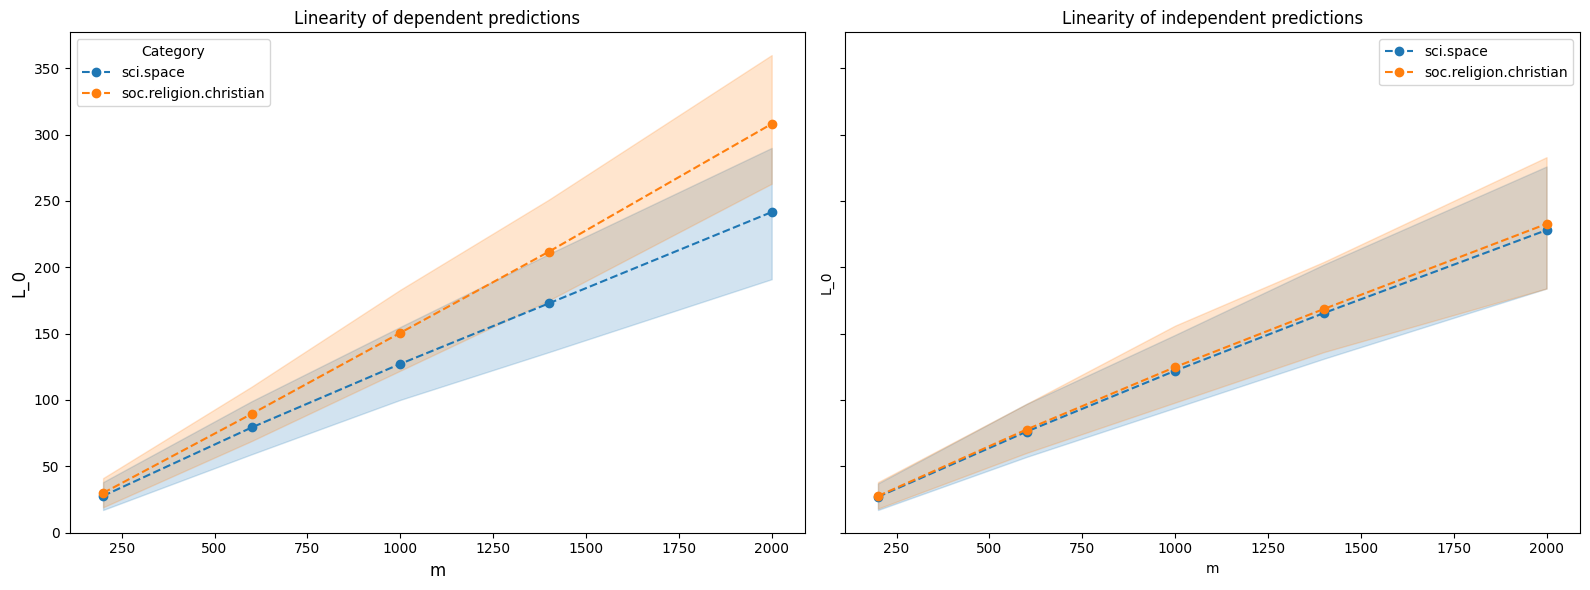

In [69]:
## Helper extraction functions
def extract_dep(arr, col='L_0'):
    vals = arr[['m', col, 'HPD', 'state']].copy()
    hpds = vals['HPD'].str.strip('()').str.split(',', expand=True)
    vals['lower'] = hpds[0].astype(float)
    vals['upper'] = hpds[1].astype(float)
    return vals

def extract_ind(arr, col_l0s, col_hpd_dict):
    # col_l0s: list of L0 col names; col_hpd_dict: {catname: hpd_colname}
    dfs = []
    for name in col_l0s:
        hpd_col = col_hpd_dict[name]
        vals = arr[['m', name, hpd_col]].copy()
        hpds = vals[hpd_col].str.strip('()').str.split(',', expand=True)
        vals['lower'] = hpds[0].astype(float)
        vals['upper'] = hpds[1].astype(float)
        vals = vals.rename(columns={name: 'L_0'})
        vals['state'] = name.replace('_L0', '')
        dfs.append(vals)
    return pd.concat(dfs, ignore_index=True)

categories = ['sci.space', 'soc.religion.christian']

# Dependent model data
dep_df_all = extract_dep(dep_predictions[dep_predictions['state'].isin(categories)])

# Independent model data
ind_col_l0s = [f"{cat}_L0" for cat in categories]
ind_col_hpd = {f"{cat}_L0": f"{cat}_HPD" for cat in categories}
ind_df_all = extract_ind(ind_predictions, ind_col_l0s, ind_col_hpd)
ind_df_all['state'] = ind_df_all['state'].str.replace('_L0','')

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot 1: Dependent, different categories
ax = axes[0]
for cat, color in zip(categories, ['tab:blue', 'tab:orange']):
    data = dep_df_all[dep_df_all['state'] == cat]
    ax.plot(data['m'], data['L_0'], marker='o', color=color, label=cat, linestyle='dashed')
    ax.fill_between(data['m'], data['lower'], data['upper'], color=color, alpha=0.2)
ax.set_title('Linearity of dependent predictions')
ax.set_xlabel('m', fontsize=12)
ax.set_ylabel('L_0', fontsize=12)
ax.legend(title='Category')

# Plot 2: Independent, different categories
ax = axes[1]
for cat, color in zip(categories, ['tab:blue', 'tab:orange']):
    data = ind_df_all[ind_df_all['state'] == cat]
    ax.plot(data['m'], data['L_0'], marker='o', color=color, label=cat, linestyle='dashed')
    ax.fill_between(data['m'], data['lower'], data['upper'], color=color, alpha=0.2)
ax.set_title('Linearity of independent predictions')
ax.set_xlabel('m')
ax.set_ylabel('L_0')
ax.legend()

plt.tight_layout()
plt.show()


In [134]:
base_state = 'soc.religion.christian'
other_states = ['soc.religion.christian', 'sci.space']
other_states.remove(base_state)

df_focus = dep_predictions[dep_predictions['state'] == base_state]
base_state_global_new = df_focus['L_0_0']

# df_focus['L_0_0'] / (df_focus[f'L_from_{other_states[0]}'] +  df_focus[f'L_from_{other_states[1]}'] +  df_focus[f'L_from_{other_states[2]}'])
df_focus['L_0_0'] / df_focus['L_0']

1    0.322256
3    0.282951
5    0.253687
7    0.233399
9    0.207750
dtype: float64

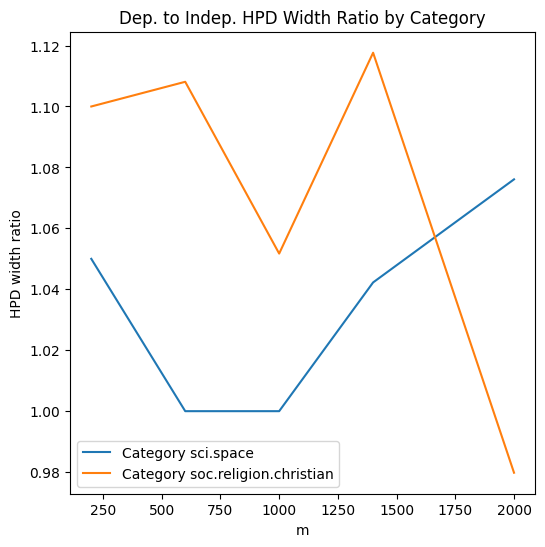

In [75]:
model_comparison['width_ratio'] = model_comparison['dependent_hpd_width'] / model_comparison['independent_hpd_width']
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
# Group the data by 'state' and plot width_ratio vs m for each state
for state, group in model_comparison.groupby('state'):
    plt.plot(group['m'], group['width_ratio'], label=f'Category {state}')

plt.xlabel('m')
plt.ylabel('HPD width ratio')
plt.title('Dep. to Indep. HPD Width Ratio by Category')
plt.legend()
plt.show()

In [116]:
dep_predictions

,m,state,L_0_0,L_from_soc.religion.christian,L_0,HPD,L_from_sci.space
0,200,sci.space,9.86,17.74,27.59,"(17, 38)",NaN
1,200,soc.religion.christian,9.60,NaN,29.79,"(19, 41)",20.19
2,600,sci.space,28.61,50.59,79.20,"(59, 99)",NaN
3,600,soc.religion.christian,25.31,NaN,89.45,"(69, 110)",64.14
4,1000,sci.space,45.83,81.30,127.13,"(100, 155)",NaN
5,1000,soc.religion.christian,38.19,NaN,150.54,"(122, 183)",112.35
6,1400,sci.space,62.06,110.72,172.78,"(136, 210)",NaN
7,1400,soc.religion.christian,49.42,NaN,211.74,"(175, 251)",162.33
8,2000,sci.space,86.41,155.22,241.62,"(191, 290)",NaN
9,2000,soc.religion.christian,64.01,NaN,308.11,"(263, 360)",244.10


In [117]:
ind_predictions

,m,sci.space_L0,sci.space_HPD,soc.religion.christian_L0,soc.religion.christian_HPD
0,200,26.86,"(17, 37)",27.47,"(18, 38)"
1,600,76.05,"(57, 97)",77.67,"(60, 97)"
2,1000,121.96,"(94, 149)",124.74,"(98, 156)"
3,1400,165.42,"(131, 202)",168.50,"(136, 204)"
4,2000,228.04,"(184, 276)",232.71,"(184, 283)"


In [135]:
model_comparison

,m,state,independent_mean,dependent_mean,mean_difference,independent_hpd_width,dependent_hpd_width,width_reduction_pct,width_ratio
0,200,sci.space,26.86,27.59,0.73,20.0,21.0,-5.0,1.050000
1,200,soc.religion.christian,27.47,29.79,2.32,20.0,22.0,-10.0,1.100000
2,600,sci.space,76.05,79.20,3.15,40.0,40.0,0.0,1.000000
3,600,soc.religion.christian,77.67,89.45,11.78,37.0,41.0,-10.8,1.108108
4,1000,sci.space,121.96,127.13,5.17,55.0,55.0,0.0,1.000000
5,1000,soc.religion.christian,124.74,150.54,25.79,58.0,61.0,-5.2,1.051724
6,1400,sci.space,165.42,172.78,7.36,71.0,74.0,-4.2,1.042254
7,1400,soc.religion.christian,168.50,211.74,43.24,68.0,76.0,-11.8,1.117647
8,2000,sci.space,228.04,241.62,13.58,92.0,99.0,-7.6,1.076087
9,2000,soc.religion.christian,232.71,308.11,75.40,99.0,97.0,2.0,0.979798


In [119]:
param_estimates

,model,state,theta_0,theta_j,d_0,d_j,num_base_tables,num_unique_dishes
0,Independent,sci.space,301.15 ± 17.19,1306.62 ± 84.39,0.0030 ± 0.0027,0.0258 ± 0.0259,203.0,203.0
1,Independent,soc.religion.christian,305.11 ± 18.94,1327.78 ± 92.78,0.0041 ± 0.0043,0.0279 ± 0.0292,205.0,205.0
2,Dependent,ALL (shared),269.69 ± 13.18,636.06 ± 44.31,0.0024 ± 0.0025,0.0045 ± 0.0044,334.0,334.0


## News 6 categories

In [77]:
dep_predictions = pd.read_csv('scripts/results_news_noun_6cats_final_V2/tables/dependent_predictions.csv')
ind_predictions = pd.read_csv('scripts/results_news_noun_6cats_final_V2/tables/independent_predictions.csv')
model_comparison = pd.read_csv('scripts/results_news_noun_6cats_final_V2/tables/model_comparison.csv')
param_estimates = pd.read_csv('scripts/results_news_noun_final_V2/tables/parameter_estimates.csv')

In [78]:
ind_predictions

,m,sci.space_L0,sci.space_HPD,soc.religion.christian_L0,soc.religion.christian_HPD,alt.atheism_L0,alt.atheism_HPD,sci.med_L0,sci.med_HPD,talk.politics.guns_L0,talk.politics.guns_HPD,rec.motorcycles_L0,rec.motorcycles_HPD
0,200,25.25,"(15, 36)",31.01,"(21, 42)",26.11,"(17, 37)",24.33,"(14, 35)",27.99,"(18, 39)",20.98,"(12, 31)"
1,600,71.49,"(53, 91)",88.56,"(68, 111)",74.18,"(56, 94)",68.95,"(50, 91)",79.66,"(59, 100)",59.96,"(43, 79)"
2,1000,114.74,"(89, 143)",142.95,"(114, 174)",118.85,"(91, 149)",110.88,"(83, 139)",128.57,"(99, 158)",96.17,"(72, 123)"
3,1400,156.55,"(123, 193)",194.64,"(158, 234)",161.50,"(127, 198)",151.61,"(118, 187)",174.51,"(140, 211)",130.85,"(99, 165)"
4,2000,216.70,"(170, 267)",270.75,"(219, 325)",224.01,"(176, 270)",208.55,"(165, 256)",241.18,"(194, 292)",180.57,"(140, 227)"


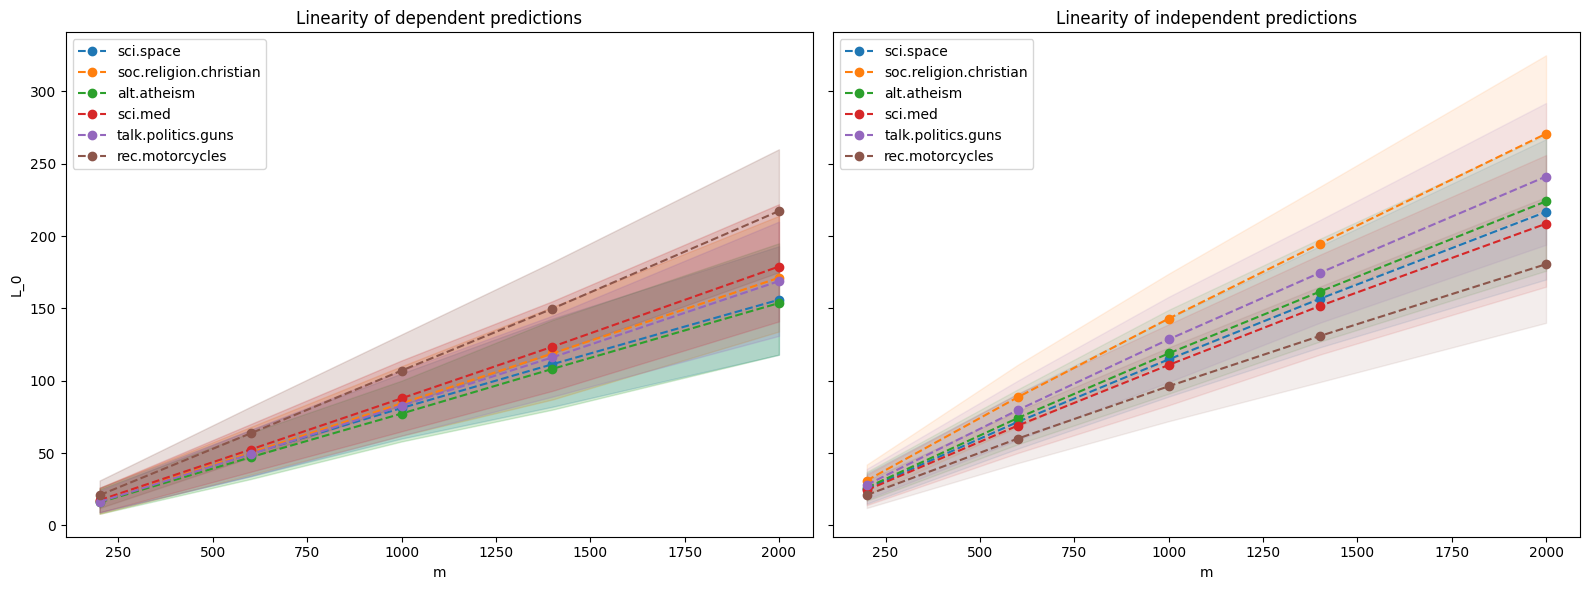

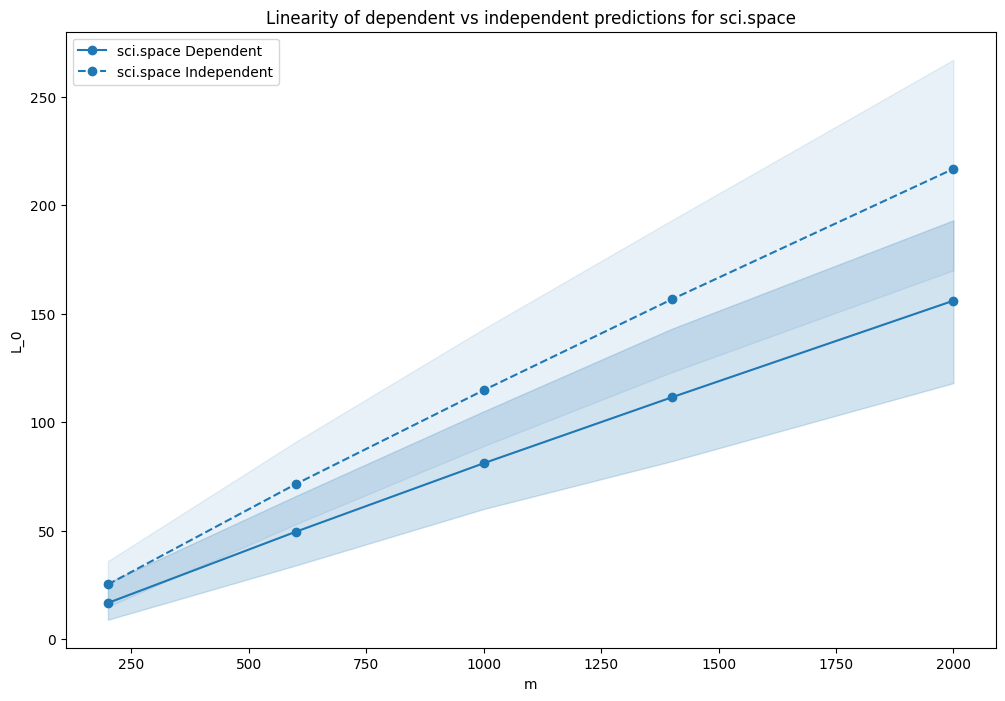

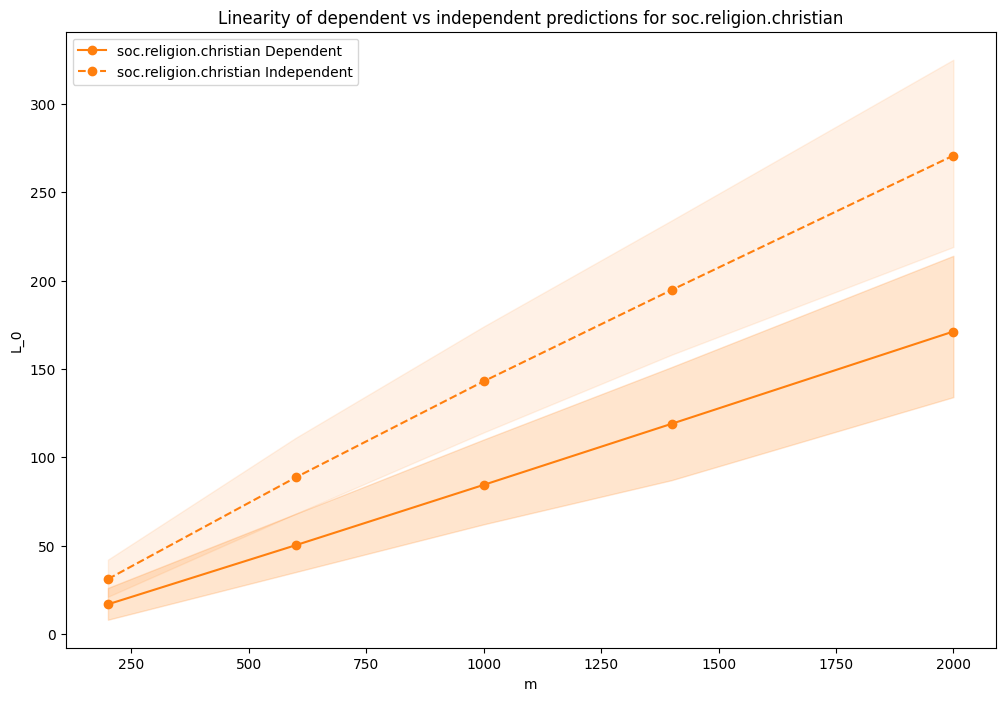

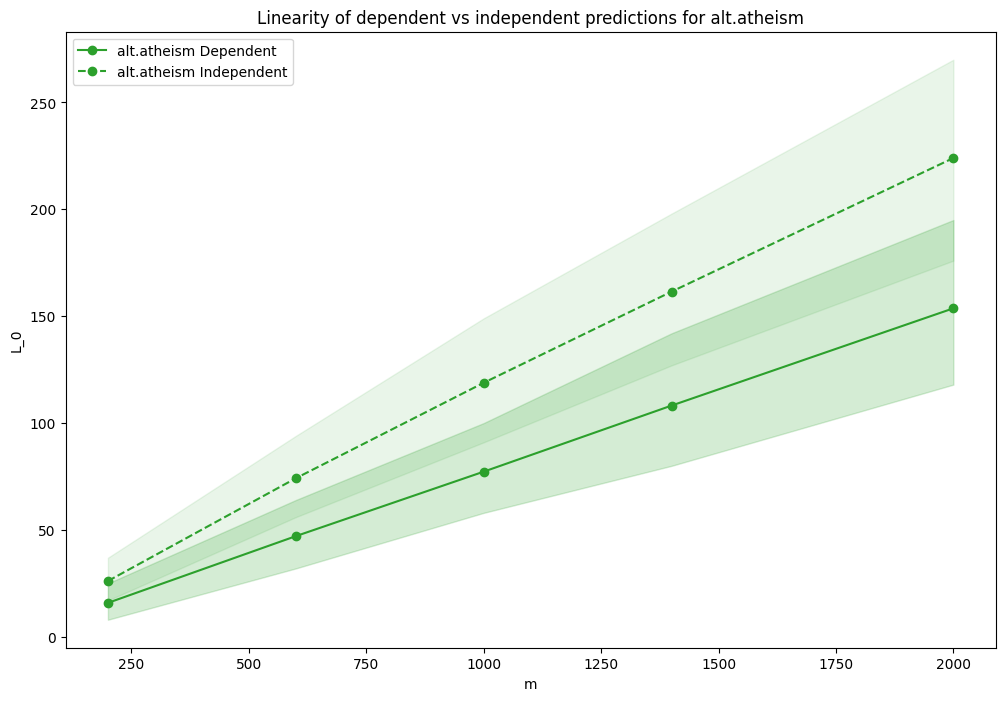

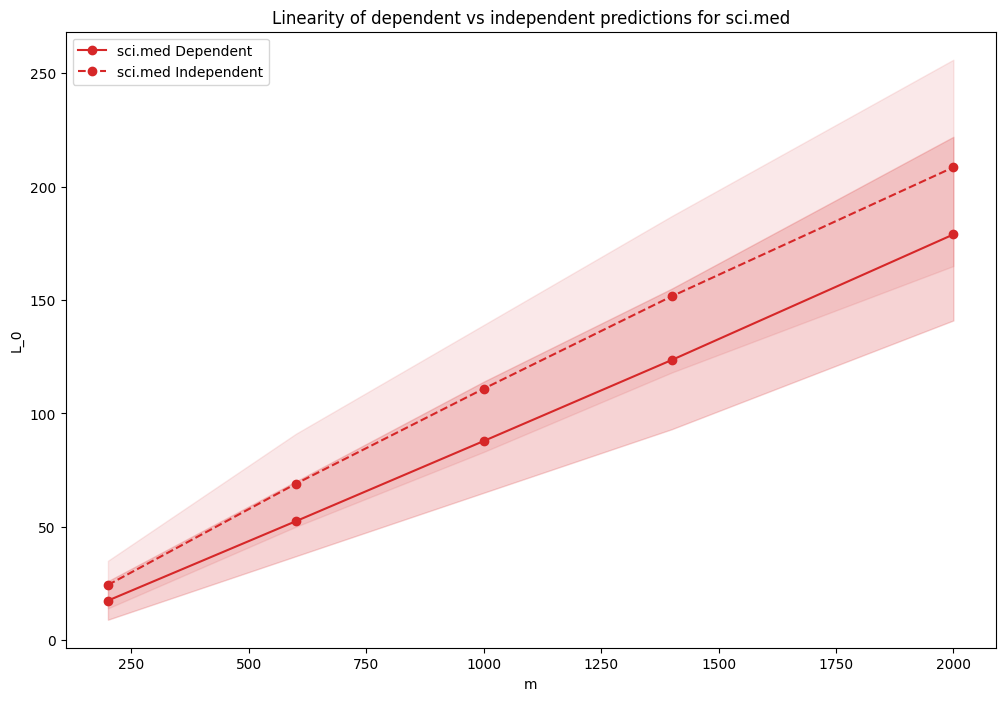

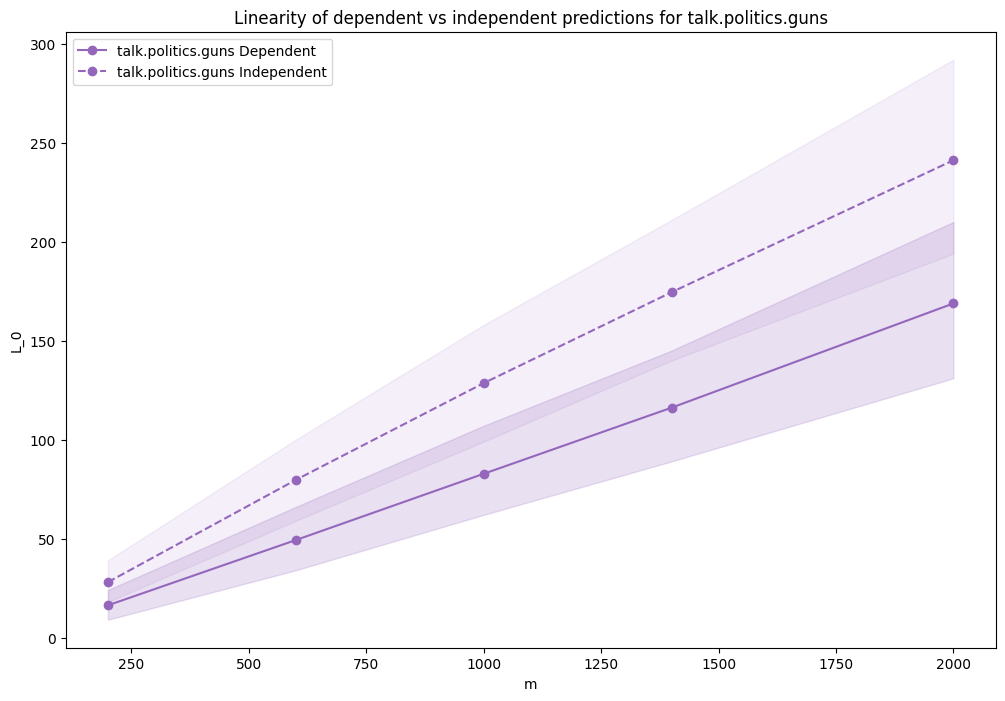

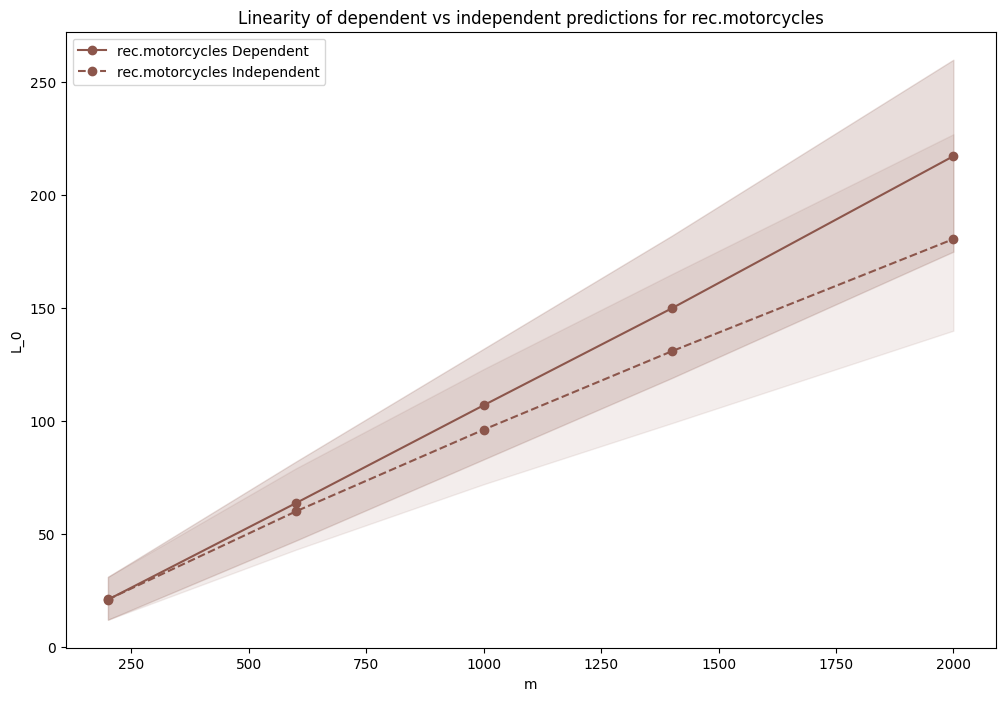

In [84]:
## Linearity Dependent
def extract_dep(arr, col='L_0'):
    vals = arr[['m', col, 'HPD']].copy()
    # HPD is assumed as a tuple string, e.g. "(28, 51)"
    hpds = vals['HPD'].str.strip('()').str.split(',', expand=True)
    vals['lower'] = hpds[0].astype(float)
    vals['upper'] = hpds[1].astype(float)
    return vals

space_dep_df = extract_dep(dep_predictions[dep_predictions['state']=='sci.space'])
relig_dep_df = extract_dep(dep_predictions[dep_predictions['state']=='soc.religion.christian'])
athei_dep_df = extract_dep(dep_predictions[dep_predictions['state']=='alt.atheism'])
med_dep_df = extract_dep(dep_predictions[dep_predictions['state']=='sci.med'])
guns_dep_df = extract_dep(dep_predictions[dep_predictions['state']=='talk.politics.guns'])
moto_dep_df = extract_dep(dep_predictions[dep_predictions['state']=='rec.motorcycles'])
## Linearity Independent 
def extract_ind(arr, col_l0, col_hpd):
    vals = arr[['m', col_l0, col_hpd]].copy()
    hpds = vals[col_hpd].str.strip('()').str.split(',', expand=True)
    vals['lower'] = hpds[0].astype(float)
    vals['upper'] = hpds[1].astype(float)
    vals = vals.rename(columns={col_l0: 'L_0'})
    return vals

space_ind_df = extract_ind(ind_predictions, 'sci.space_L0', 'sci.space_HPD')
relig_ind_df = extract_ind(ind_predictions, 'soc.religion.christian_L0', 'soc.religion.christian_HPD')
athei_ind_df = extract_ind(ind_predictions, 'alt.atheism_L0', 'alt.atheism_HPD')
med_ind_df = extract_ind(ind_predictions, 'sci.med_L0', 'sci.med_HPD')
guns_ind_df = extract_ind(ind_predictions, 'talk.politics.guns_L0', 'talk.politics.guns_HPD')
moto_ind_df = extract_ind(ind_predictions, 'rec.motorcycles_L0', 'rec.motorcycles_HPD')

import matplotlib.pyplot as plt

# Arrange two plots in a grid of 1 row and 2 columns, share y axis
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Left: Dependent
for df, label, color in zip(
    [space_dep_df, relig_dep_df, athei_dep_df, med_dep_df, guns_dep_df, moto_dep_df],
    ['sci.space', 'soc.religion.christian', 'alt.atheism', 'sci.med', 'talk.politics.guns', 'rec.motorcycles'],
    ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']):
    axes[0].plot(df['m'], df['L_0'], label=label, marker='o', color=color, linestyle='dashed')
    axes[0].fill_between(df['m'], df['lower'], df['upper'], color=color, alpha=0.2)
axes[0].set_xlabel('m')
axes[0].set_ylabel('L_0')
axes[0].set_title('Linearity of dependent predictions')
axes[0].legend()

# Right: Independent
for df, label, color in zip(
    [space_ind_df, relig_ind_df, athei_ind_df, med_ind_df, guns_ind_df, moto_ind_df],
    ['sci.space', 'soc.religion.christian', 'alt.atheism', 'sci.med', 'talk.politics.guns', 'rec.motorcycles'],
    ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']):
    axes[1].plot(df['m'], df['L_0'], label=label, marker='o', color=color, linestyle='dashed')
    axes[1].fill_between(df['m'], df['lower'], df['upper'], color=color, alpha=0.1)
axes[1].set_xlabel('m')
axes[1].set_title('Linearity of independent predictions')
axes[1].legend()

plt.tight_layout()
plt.show()

# plot lines per state (dependent with CIs vs independent with CIs)
for state_label, dep_df, ind_df, color in zip(
    ['sci.space', 'soc.religion.christian', 'alt.atheism', 'sci.med', 'talk.politics.guns', 'rec.motorcycles'],
    [space_dep_df, relig_dep_df, athei_dep_df, med_dep_df, guns_dep_df, moto_dep_df],
    [space_ind_df, relig_ind_df, athei_ind_df, med_ind_df, guns_ind_df, moto_ind_df],
    ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
):
    plt.figure(figsize=(12, 8))
    plt.plot(dep_df['m'], dep_df['L_0'], label=f'{state_label} Dependent', marker='o', color=color)
    plt.fill_between(dep_df['m'], dep_df['lower'], dep_df['upper'], color=color, alpha=0.2)
    plt.plot(ind_df['m'], ind_df['L_0'], label=f'{state_label} Independent', marker='o', color=color, linestyle='dashed')
    plt.fill_between(ind_df['m'], ind_df['lower'], ind_df['upper'], color=color, alpha=0.1)
    plt.xlabel('m')
    plt.ylabel('L_0')
    plt.title(f'Linearity of dependent vs independent predictions for {state_label}')
    plt.legend()
    plt.show()


In [80]:
base_state = 'talk.politics.guns'
other_states = ['soc.religion.christian', 'sci.space', 'alt.atheism', 'sci.med', 'talk.politics.guns', 'rec.motorcycles']
other_states.remove(base_state)

df_focus = dep_predictions[dep_predictions['state'] == base_state]
base_state_global_new = df_focus['L_0_0']

# df_focus['L_0_0'] / (df_focus[f'L_from_{other_states[0]}'] +  df_focus[f'L_from_{other_states[1]}'] +  df_focus[f'L_from_{other_states[2]}'])
df_focus['L_0_0'] / df_focus['L_0']

4     0.105651
10    0.088713
16    0.077704
22    0.068698
28    0.058224
dtype: float64

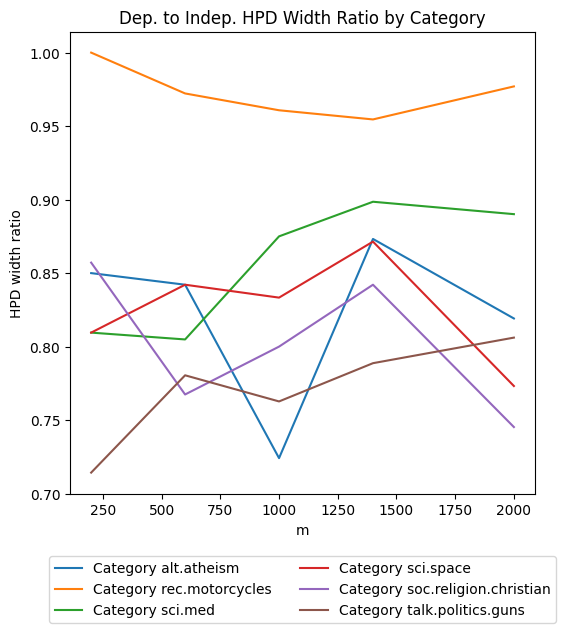

In [81]:
model_comparison['width_ratio'] = model_comparison['dependent_hpd_width'] / model_comparison['independent_hpd_width']
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
# Group the data by 'state' and plot width_ratio vs m for each state
for state, group in model_comparison.groupby('state'):
    plt.plot(group['m'], group['width_ratio'], label=f'Category {state}')

plt.xlabel('m')
plt.ylabel('HPD width ratio')
plt.title('Dep. to Indep. HPD Width Ratio by Category')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2)
plt.show()

In [23]:
dep_predictions

,m,state,L_0_0,L_from_soc.religion.christian,L_from_alt.atheism,L_from_sci.med,L_from_talk.politics.guns,L_from_rec.motorcycles,L_0,HPD,L_from_sci.space
0,200,sci.space,1.80,6.43,2.13,2.17,2.08,2.12,16.73,"(9, 26)",NaN
1,200,soc.religion.christian,1.88,NaN,2.09,2.08,1.96,2.05,16.72,"(8, 26)",6.66
2,200,alt.atheism,1.87,2.52,NaN,2.10,1.93,1.96,15.88,"(8, 25)",5.49
3,200,sci.med,1.74,5.21,1.75,NaN,1.91,1.97,17.44,"(9, 26)",4.86
4,200,talk.politics.guns,1.72,4.32,1.73,2.03,NaN,1.89,16.28,"(9, 24)",4.60
5,200,rec.motorcycles,1.67,5.89,2.01,2.16,1.93,NaN,20.89,"(12, 31)",7.22
6,600,sci.space,5.62,19.08,6.30,6.33,5.98,6.22,49.53,"(34, 66)",NaN
7,600,soc.religion.christian,5.25,NaN,5.78,5.85,5.67,5.70,50.20,"(35, 68)",21.96
8,600,alt.atheism,4.88,8.17,NaN,5.67,5.38,5.35,47.10,"(32, 64)",17.67
9,600,sci.med,4.61,16.58,5.54,NaN,4.99,5.19,52.44,"(37, 70)",15.53
